In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from tools_ryu import mytool
from tools_ryu.cross_sectional_v2 import CrossSectional

In [3]:
cdata = pd.read_pickle("Data/cmktcap_data_reduced.pickle")
bdata = pd.read_pickle("Data/binance_data_pp.pickle")

In [4]:
cmktcap = CrossSectional(cdata, vender="coinmarketcap")
binance = CrossSectional(bdata,"binance")

In [5]:
# cmktcap 컬럼을 symbol 컬럼으로 변경
symbol = []
print(len(cmktcap.price.columns))

for id in cmktcap.price.columns:
    if int(id) in list(coin_list.id):
        symbol.append(coin_list.loc[coin_list.id == int(id)].symbol.values[0])
len(symbol)

185


185

In [6]:
# 변경 /  13년 5월 6일 ~23년 4월 7일로 맞춰야함
start, end = "2013-05-06", "2023-04-07"

cmktcap.price.columns = symbol
c_price = cmktcap.price.loc[start:end].rename(columns={"MIOTA":"IOTA"})

cmktcap.mktcap.columns = symbol
c_mktcap = cmktcap.mktcap.loc[start:end].rename(columns={"MIOTA":"IOTA"})

cmktcap.daily_rtn.columns = symbol
c_rtn = cmktcap.daily_rtn.loc[start:end].rename(columns={"MIOTA":"IOTA"})

cmktcap.vol.columns = symbol
c_vol = cmktcap.vol.loc[start:end].rename(columns={"MIOTA":"IOTA"})

통계량 비교...

In [7]:
# BTC price는 거의 유사함
b = pd.concat([c_price.BTC, binance.price.BTC], axis=1, 
          keys=["C_BTC","B_BTC"])
b

,C_BTC,B_BTC
date,,
2013-05-06,112.300003,112.300011
2013-05-07,111.500000,111.500000
2013-05-08,113.566002,113.565559
2013-05-09,112.669998,112.669998
2013-05-10,117.199997,117.199997
...,...,...
2023-04-03,27790.220855,27790.220855
2023-04-04,28168.089816,28168.089816
2023-04-05,28177.983557,28177.983557


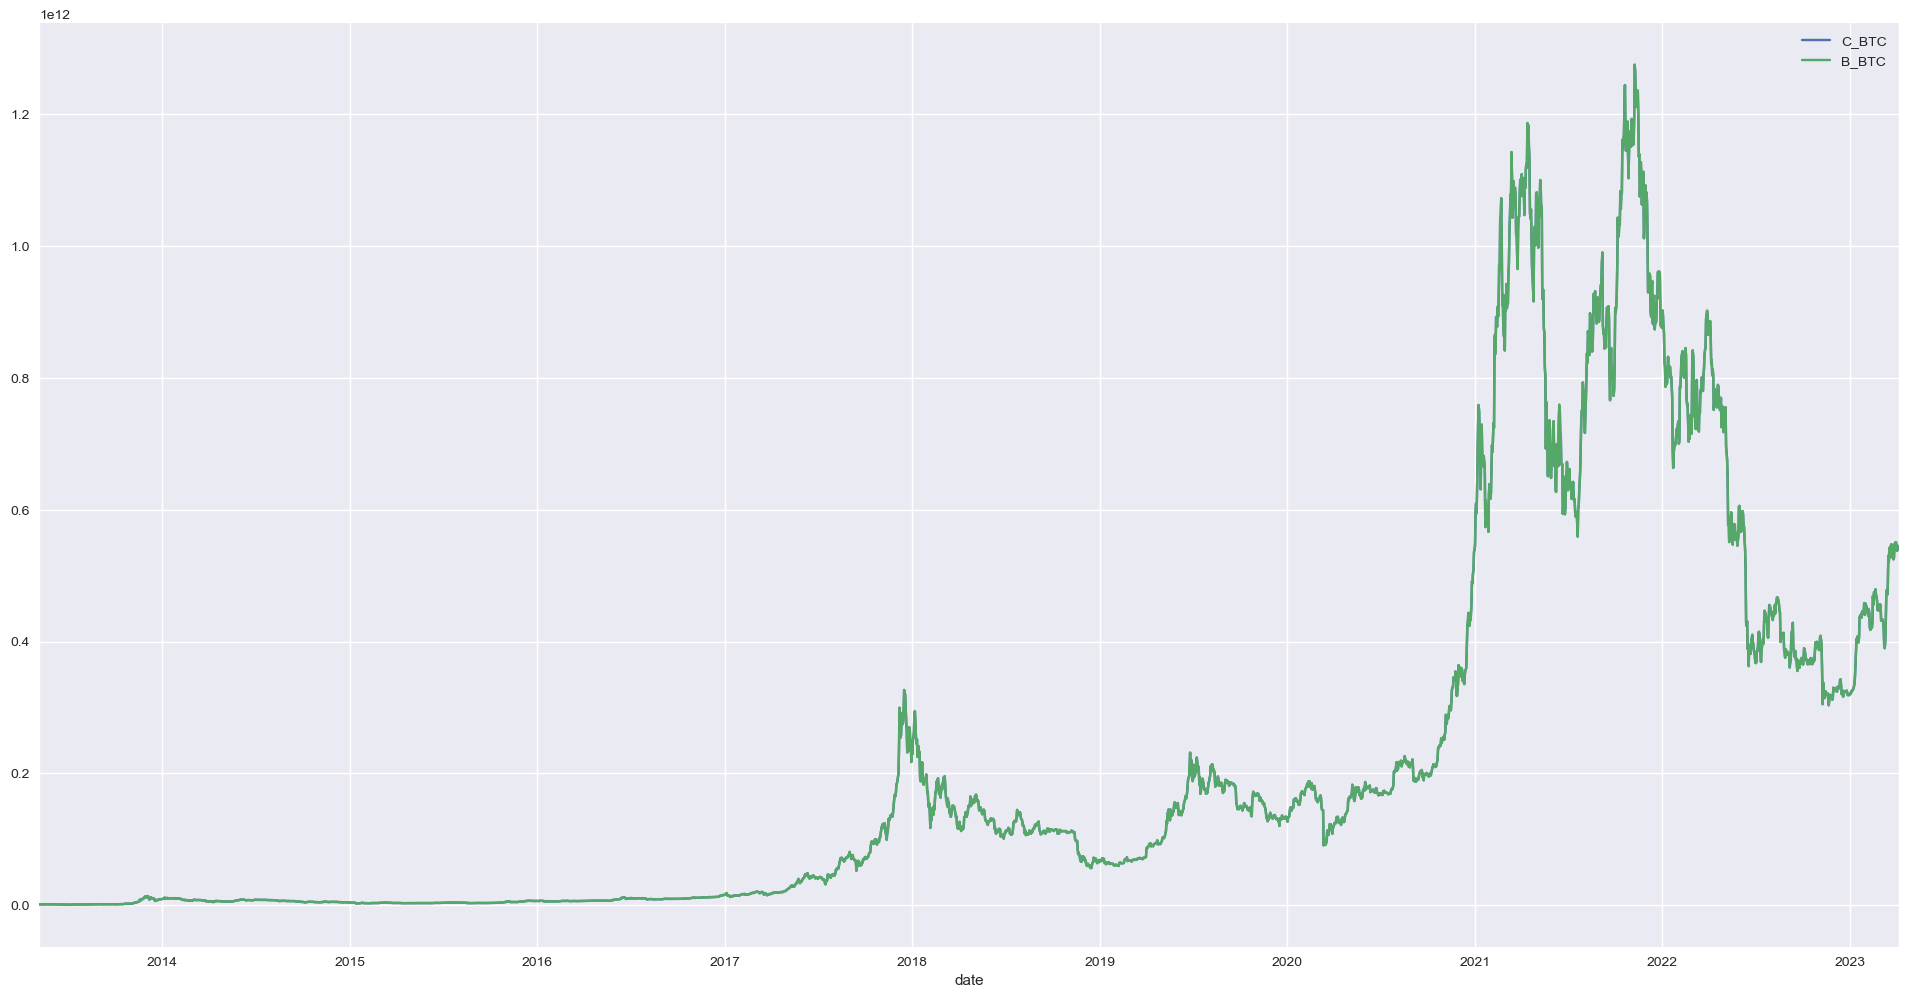

In [8]:
# BTC 마켓켑 비교
pd.concat([c_mktcap.BTC, binance.mktcap.BTC], axis=1, 
          keys=["C_BTC","B_BTC"]).plot(figsize=(24,12));

In [9]:
# BTC Vol 비교
v = pd.concat([c_vol.BTC, binance.vol.BTC], axis=1, 
          keys=["C_BTC","B_BTC"])

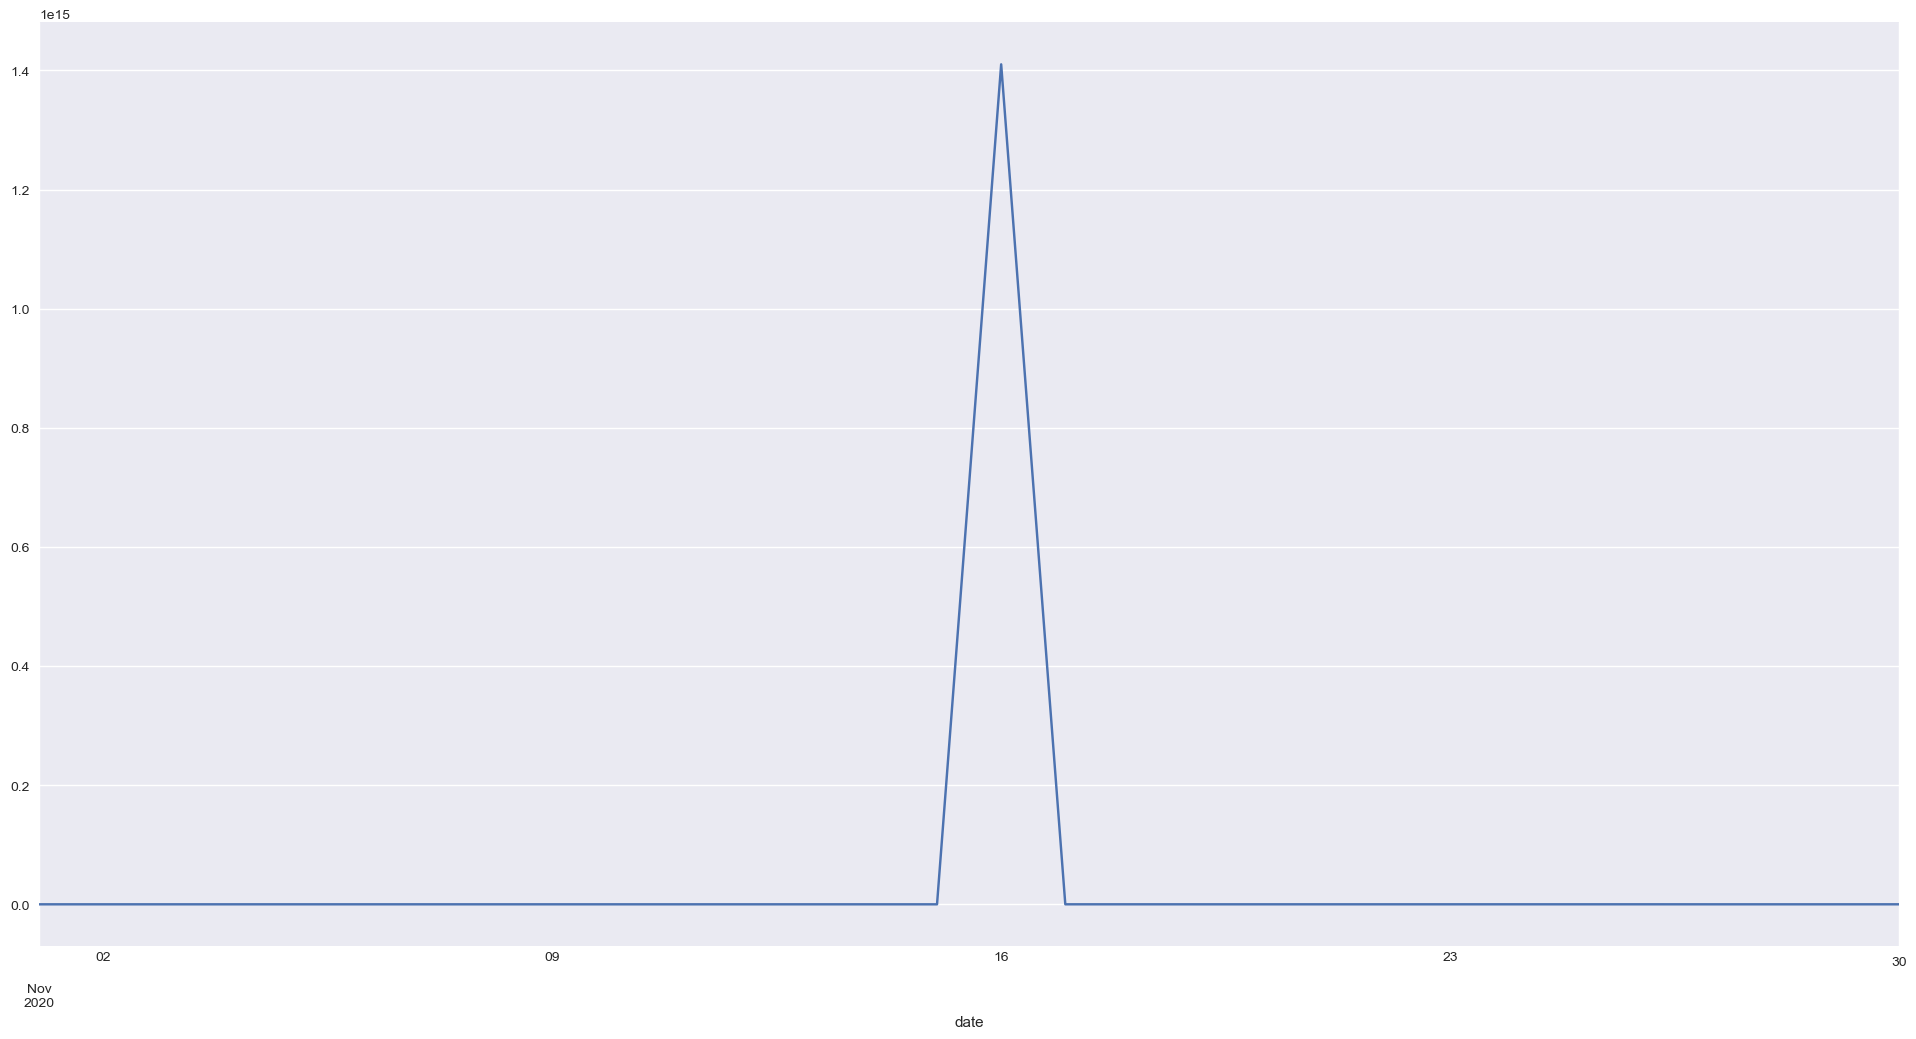

In [10]:
# 2020년 11월 16일에 거래량이 갑자기 튄다(바이낸스)
v.B_BTC.loc["2020-11"].plot(figsize=(24,12));

In [11]:
# vol 평균이 많이 차이 나는 것 처럼 보이나...
v.mean()

C_BTC    1.431519e+10
B_BTC    4.034261e+11
dtype: float64

In [12]:
# 이상하게 값이 튄 2020년 11월 16일 하루만 제거하면 거의 똑같아 진다...
v.drop("2020-11-16").mean()

C_BTC    1.431044e+10
B_BTC    1.430683e+10
dtype: float64

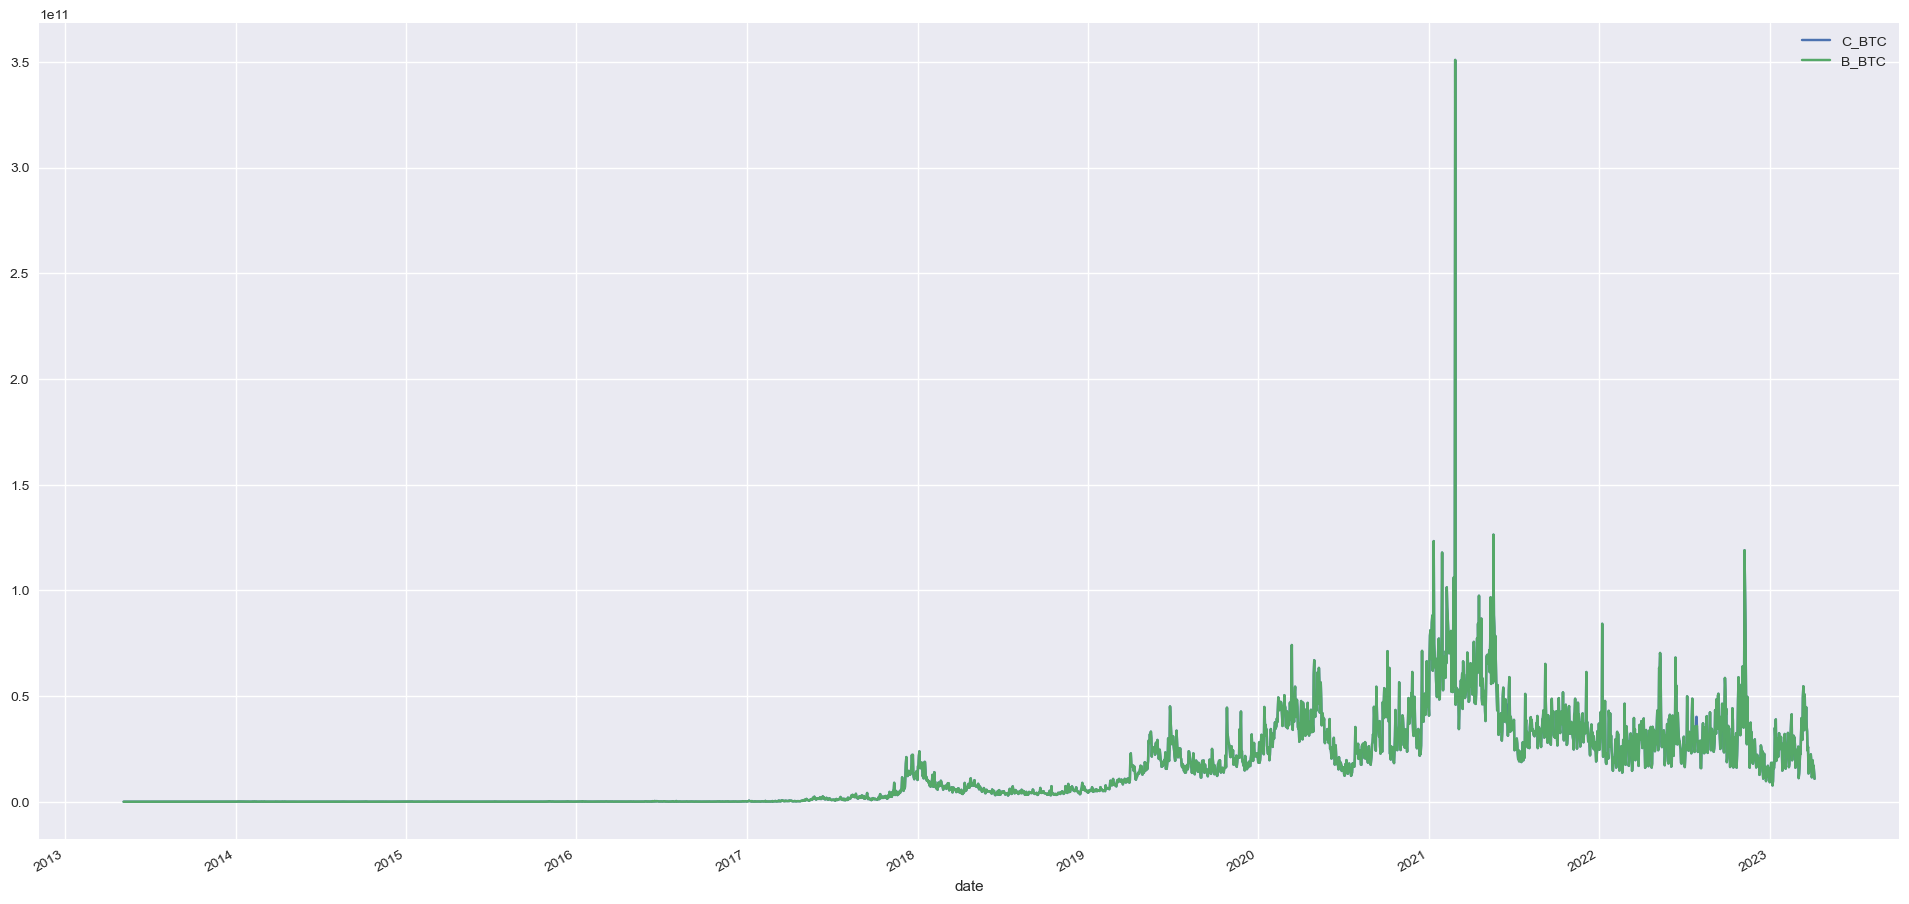

In [13]:
# 정상적인 volume plot
v.drop("2020-11-16").plot(figsize=(24,12));

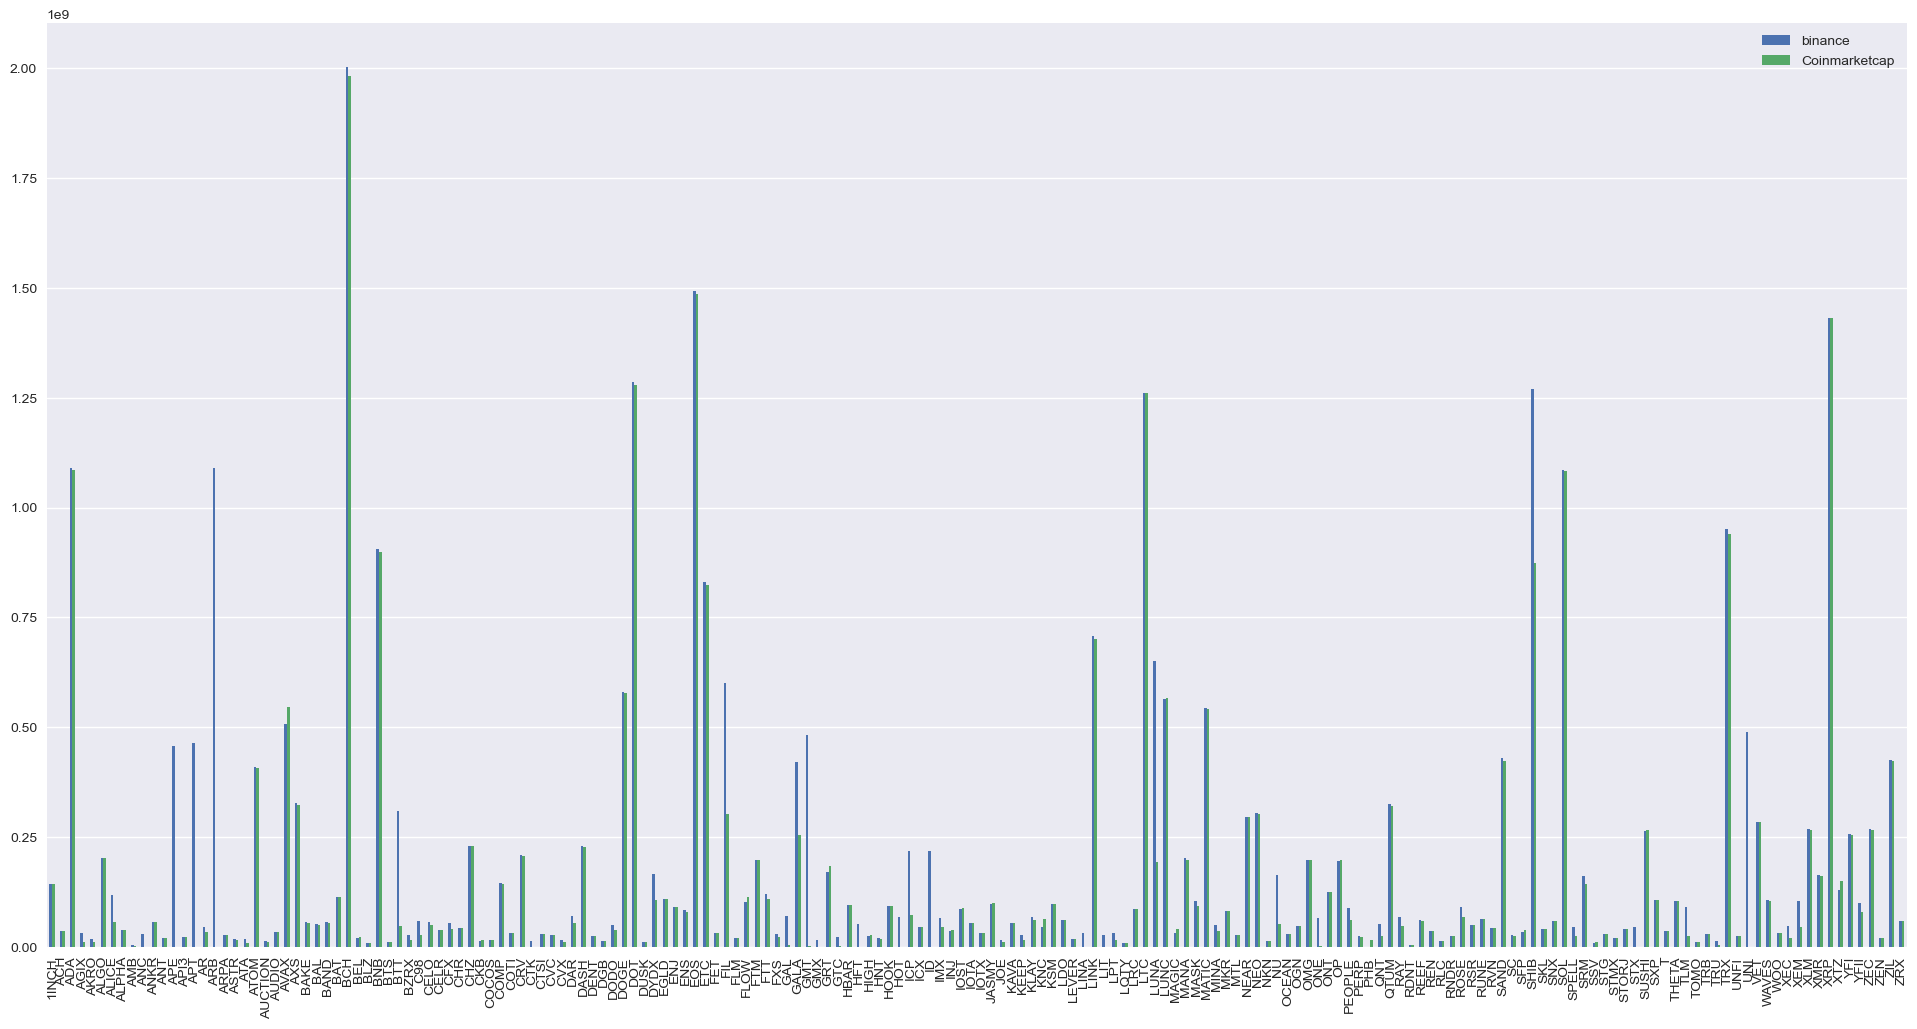

In [15]:
# Volume의 전체 평균 데이터 (BTC, AAVE, ETH 제외)
vol_concat = pd.concat([binance.vol.mean(),c_vol.mean()], axis=1,
          keys=["binance","Coinmarketcap"]) 
vol_concat.drop(["BTC","AAVE","ETH"]).plot(figsize=(24,12), kind="bar")
plt.grid(axis="x");

<Figure size 800x550 with 0 Axes>

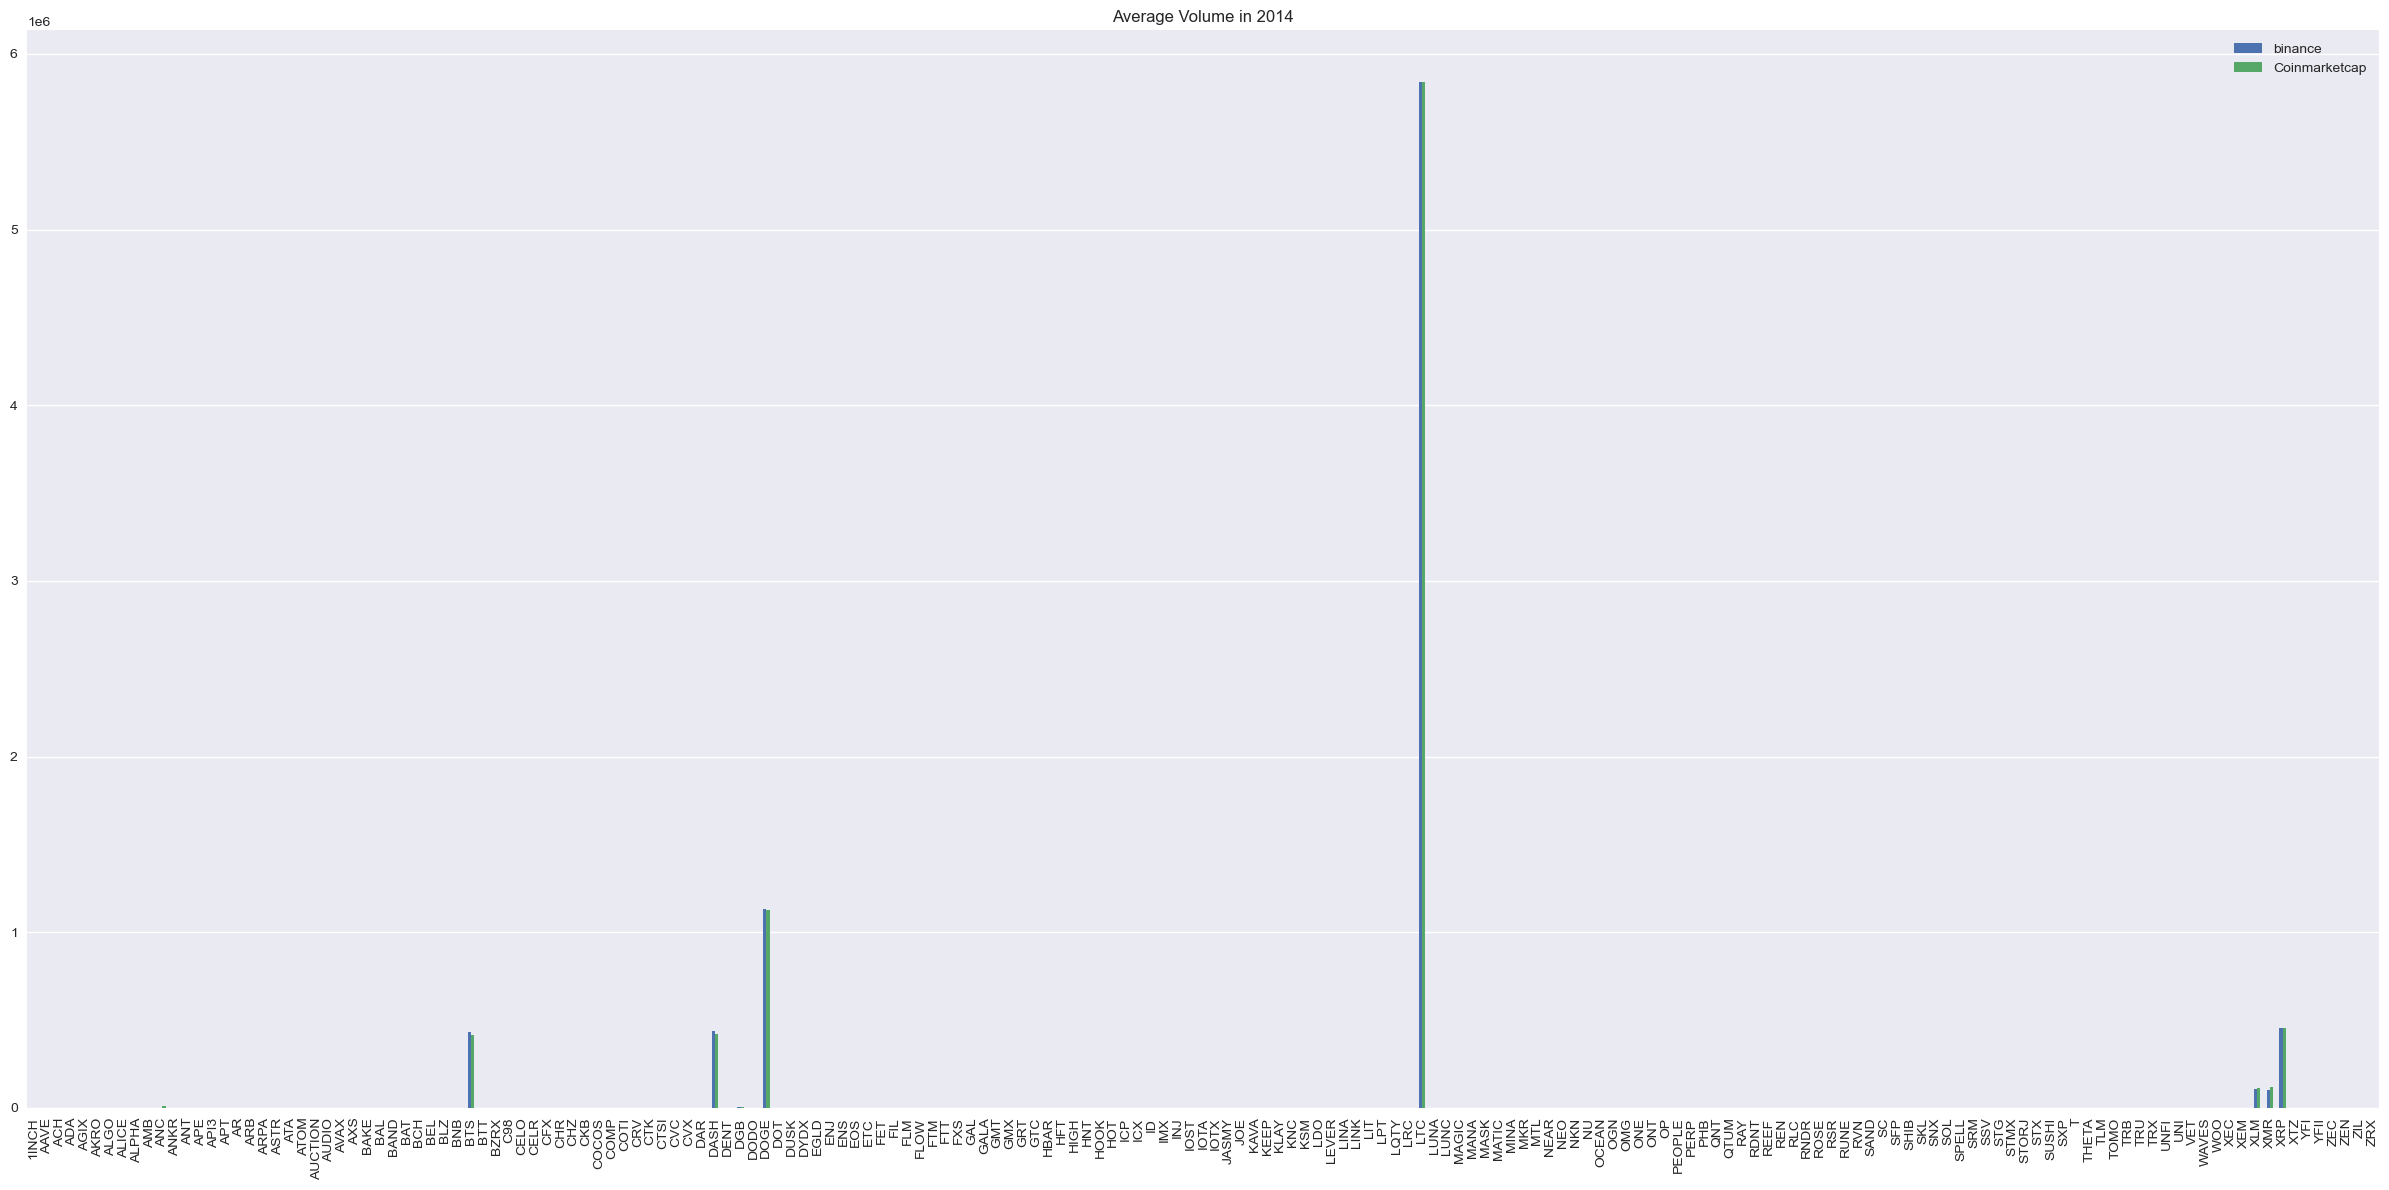

<Figure size 800x550 with 0 Axes>

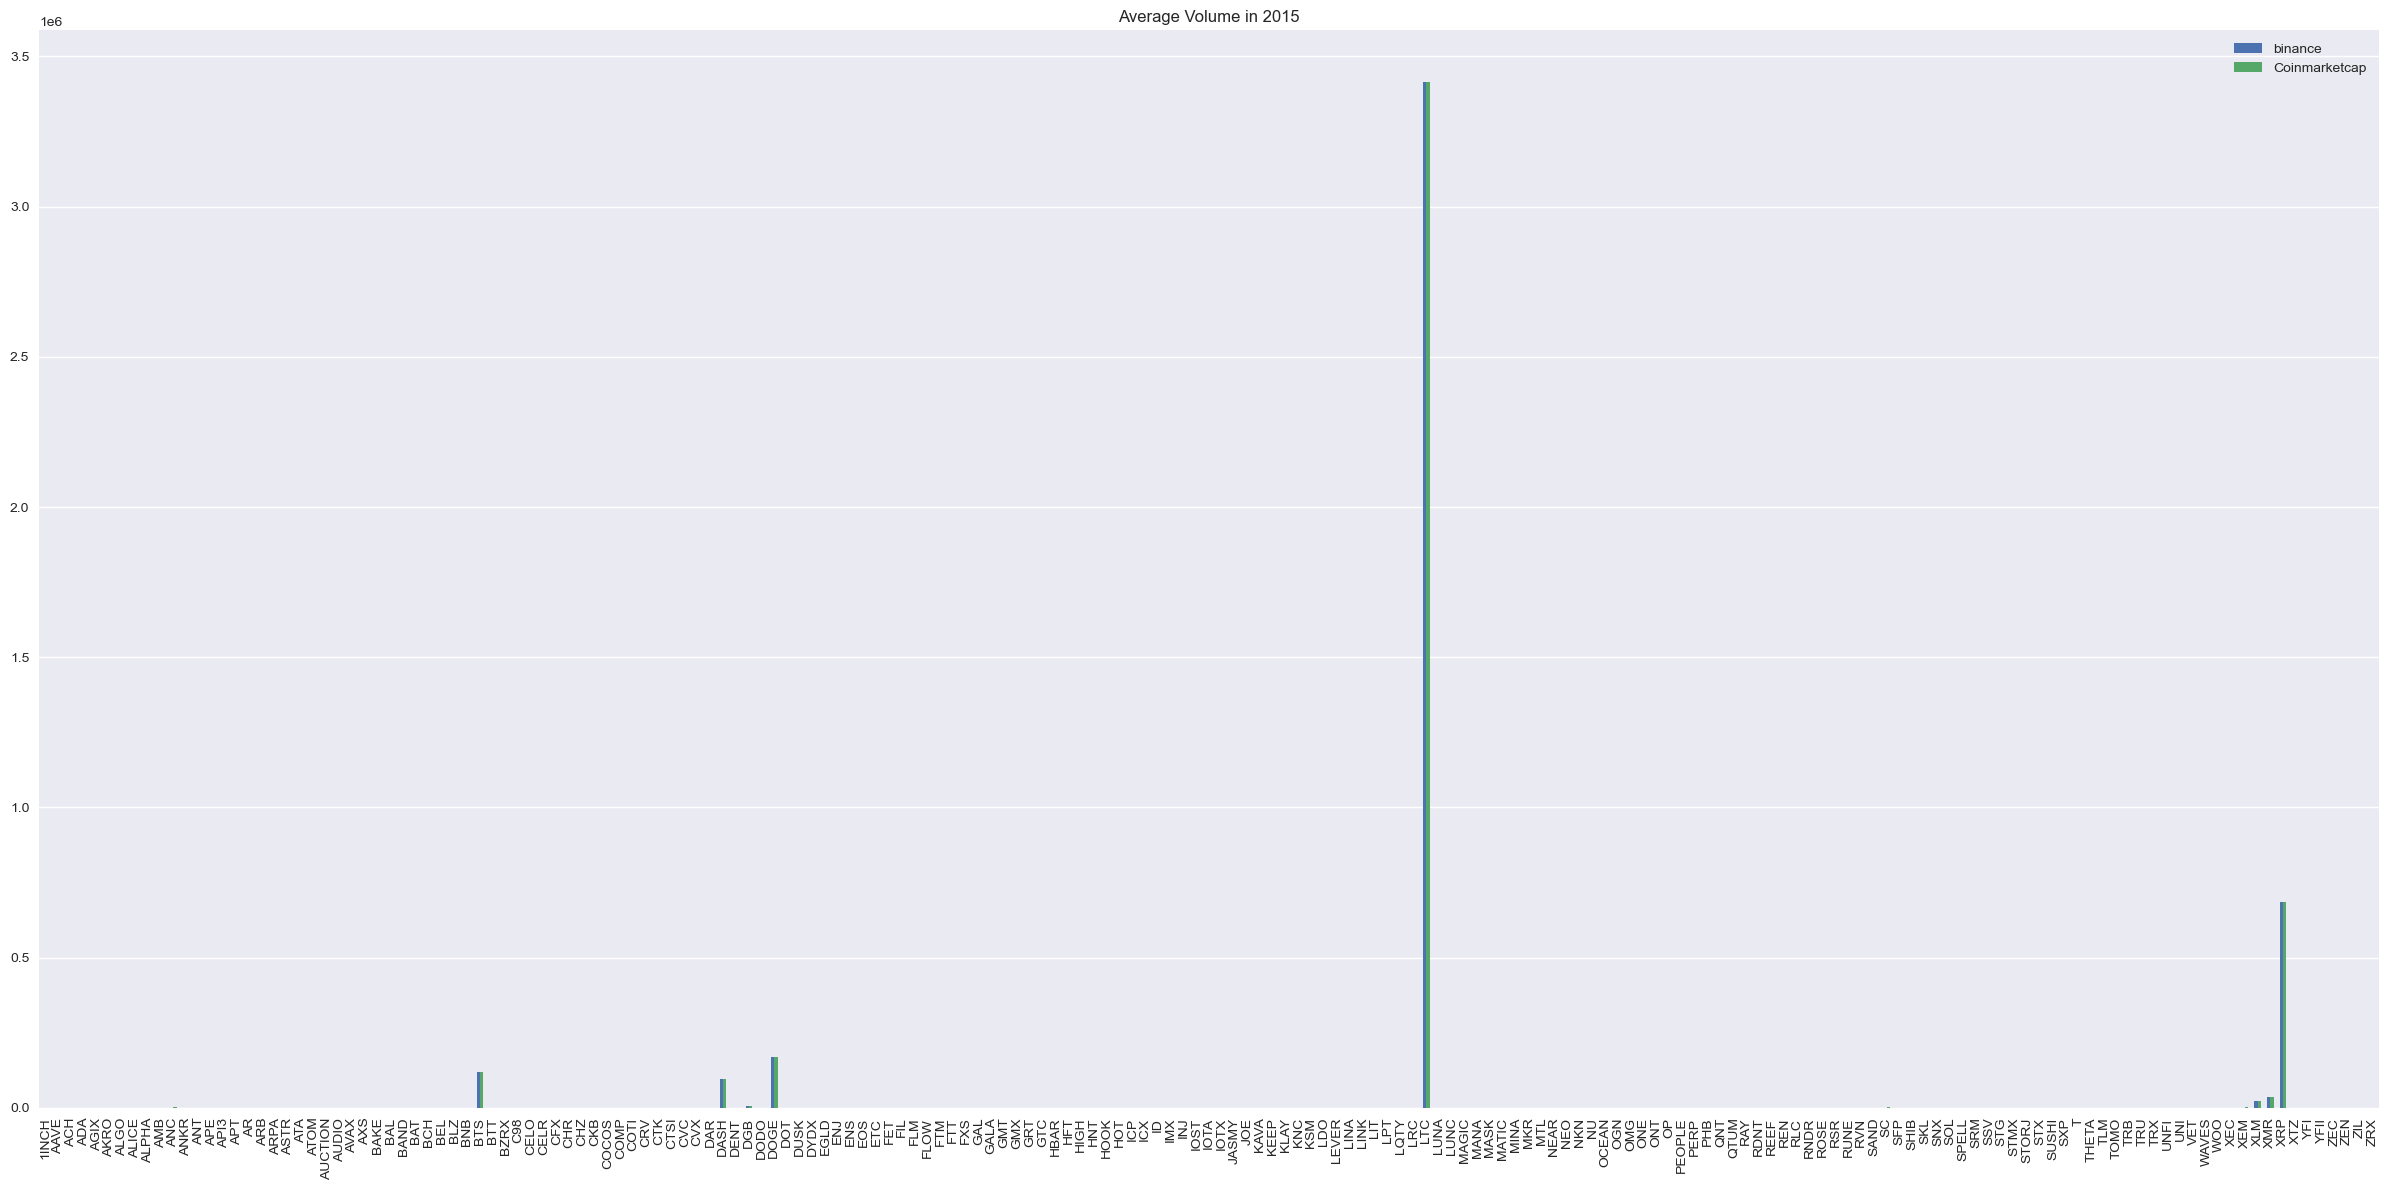

<Figure size 800x550 with 0 Axes>

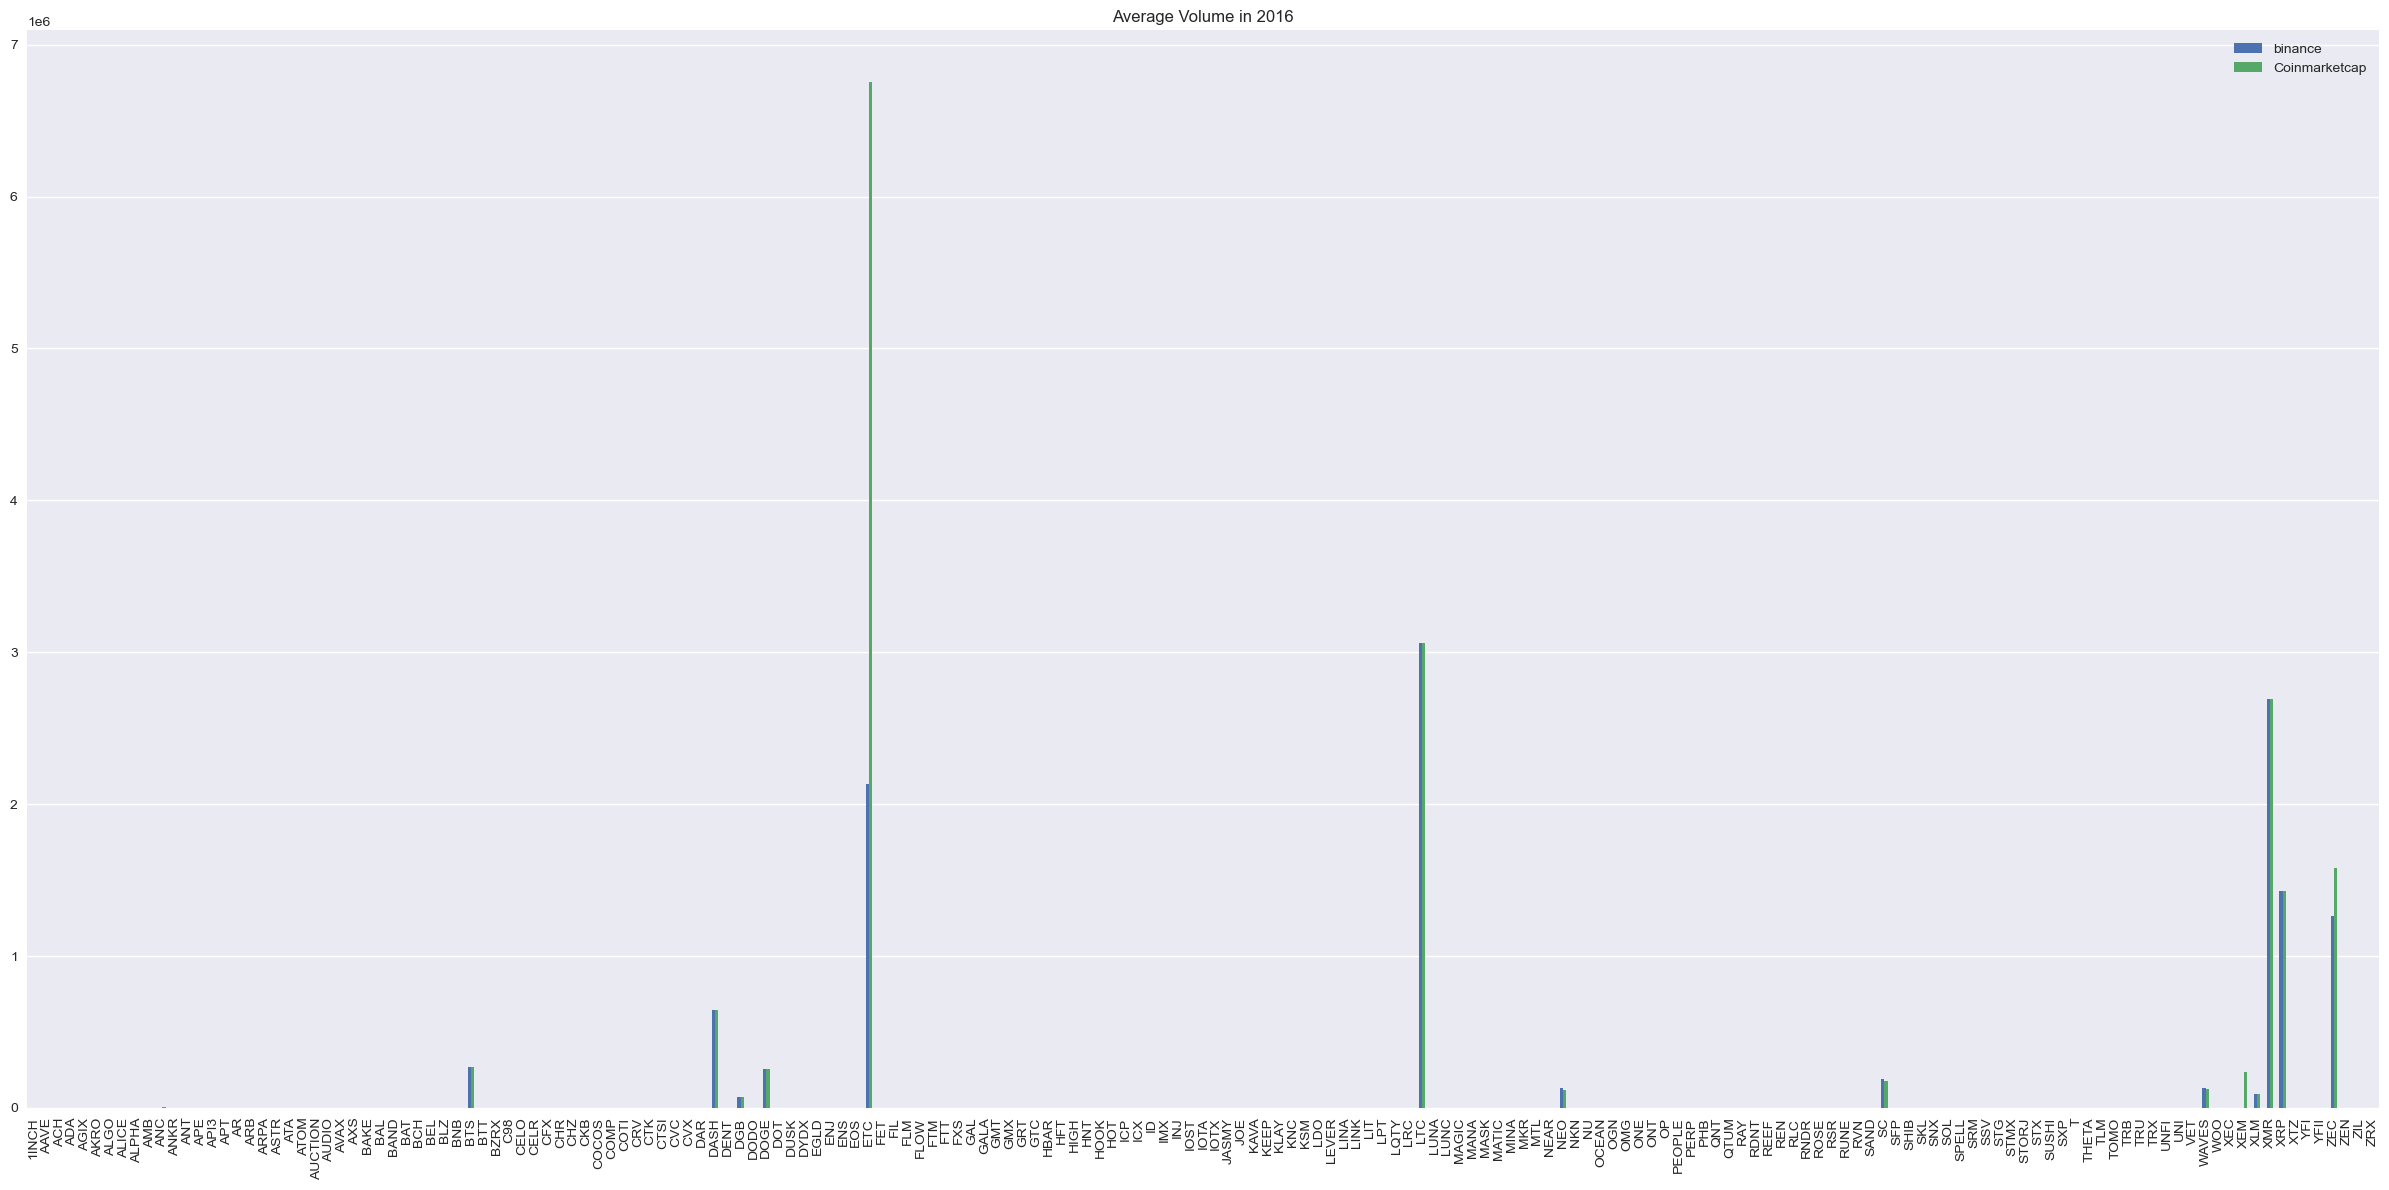

<Figure size 800x550 with 0 Axes>

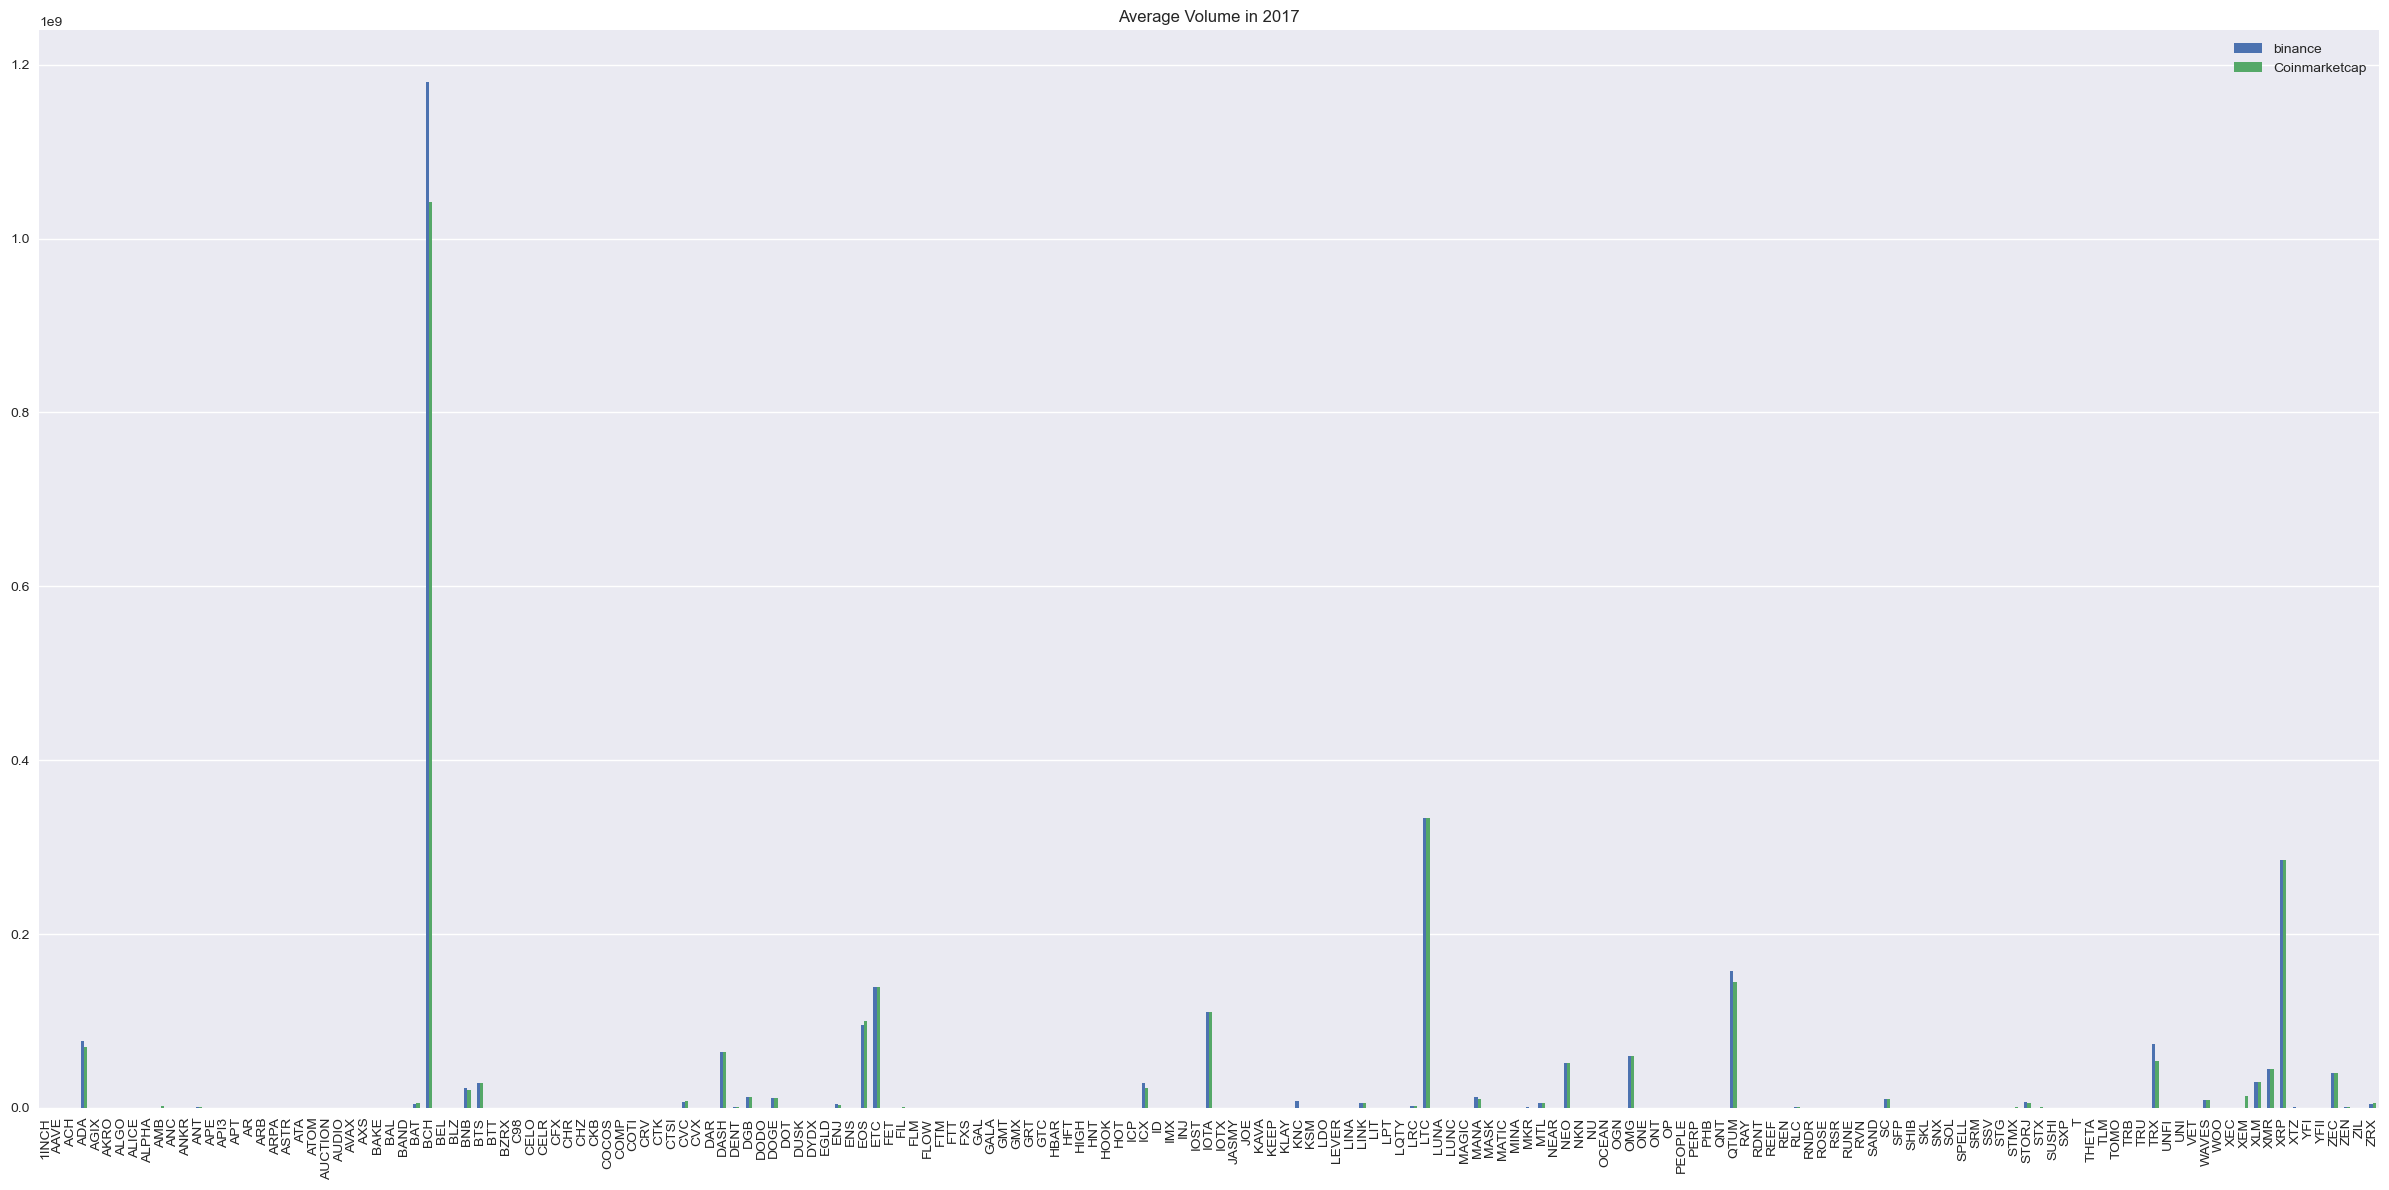

<Figure size 800x550 with 0 Axes>

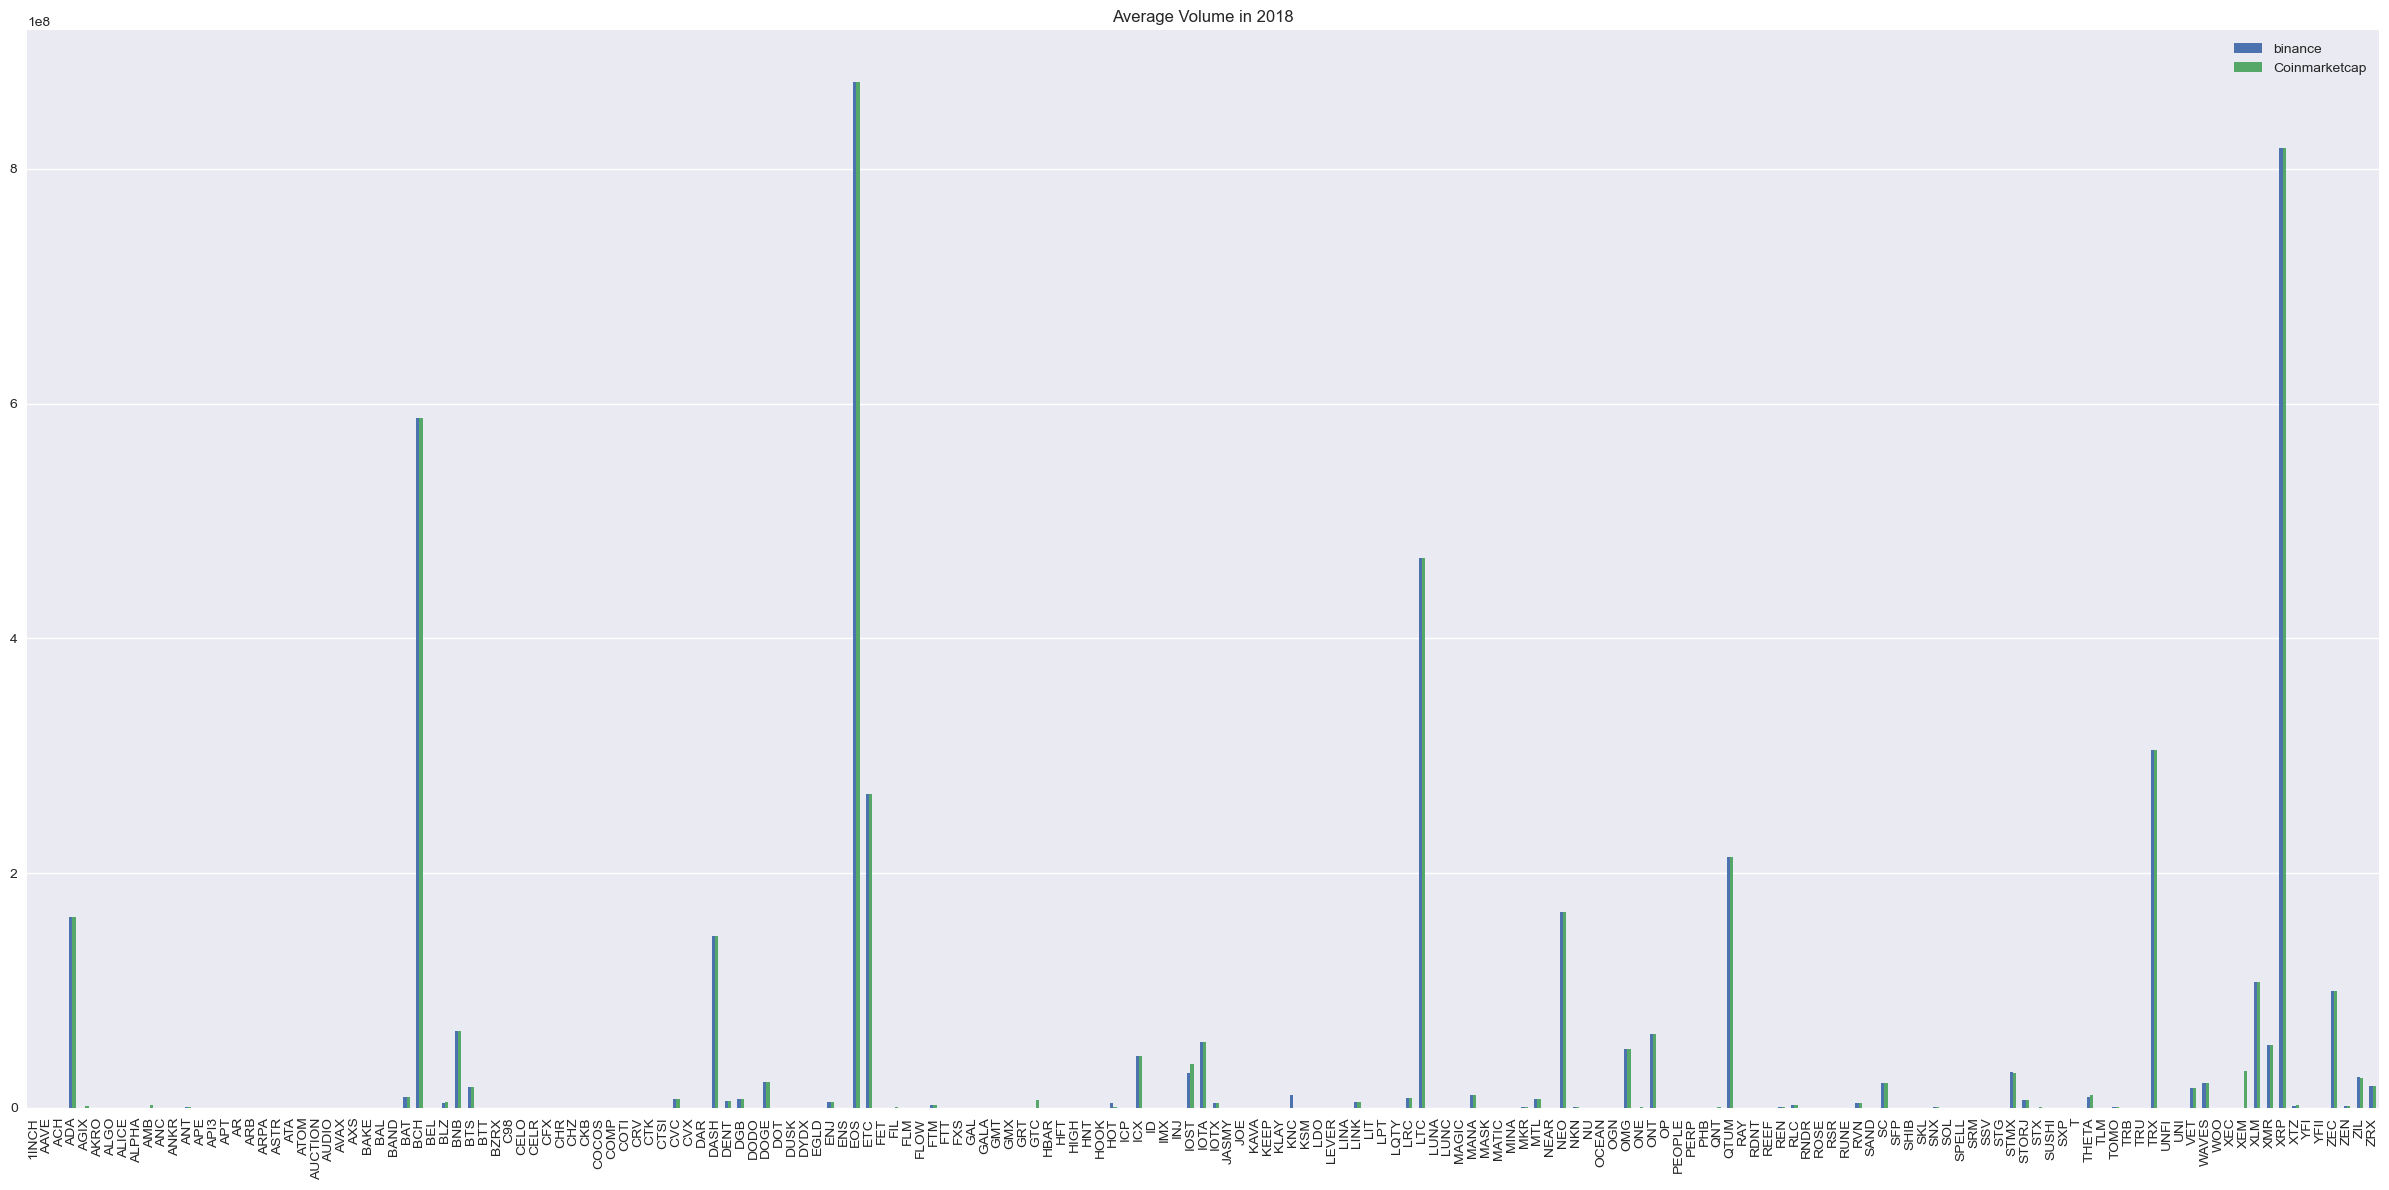

<Figure size 800x550 with 0 Axes>

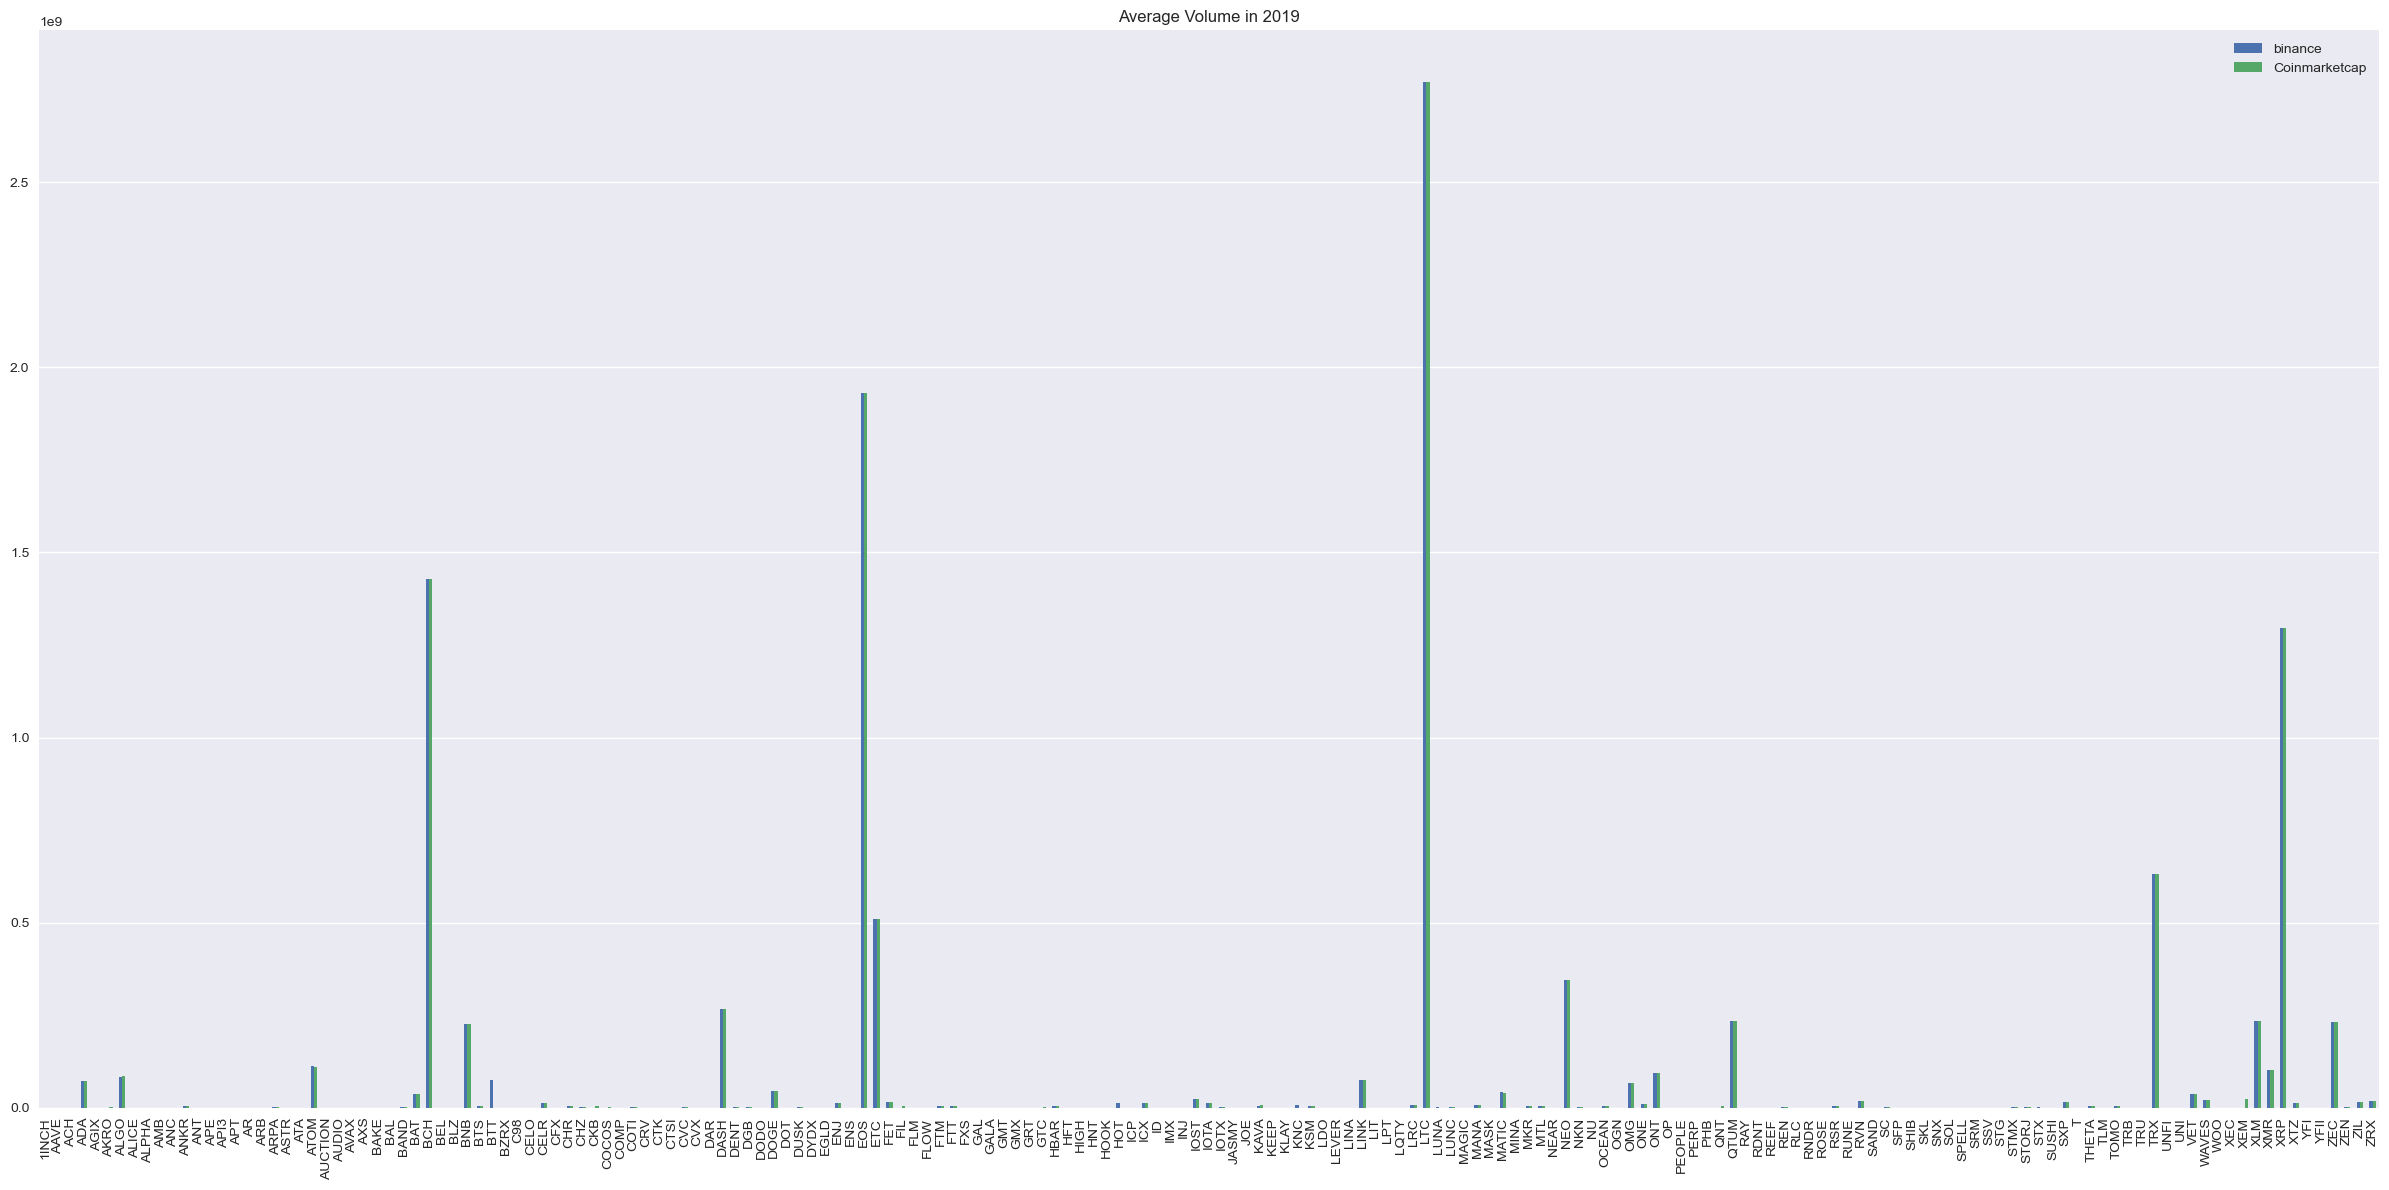

<Figure size 800x550 with 0 Axes>

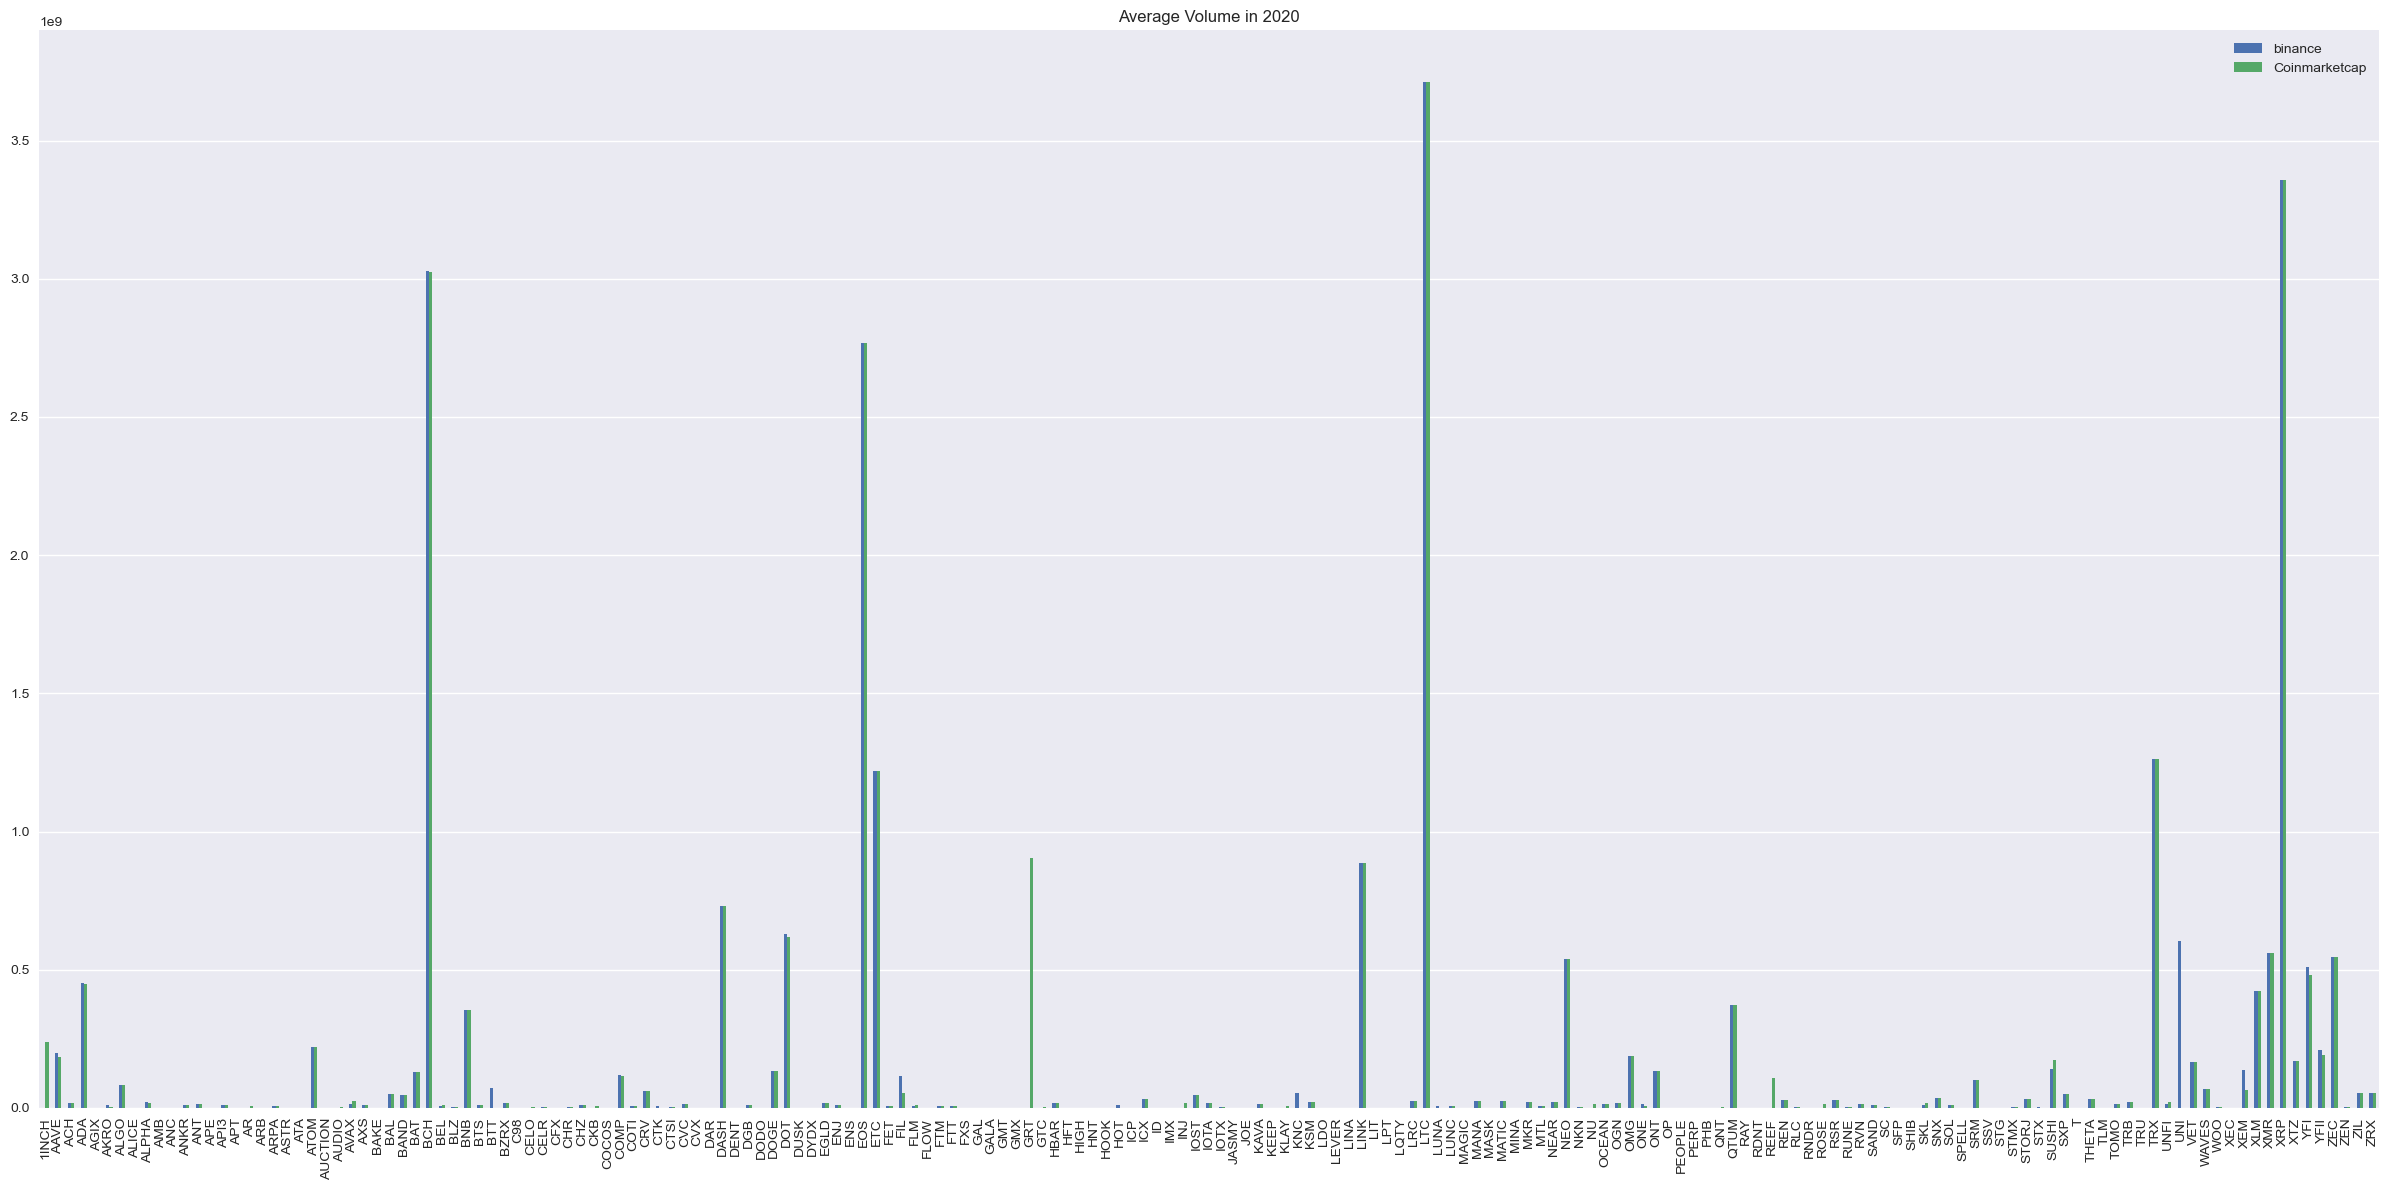

<Figure size 800x550 with 0 Axes>

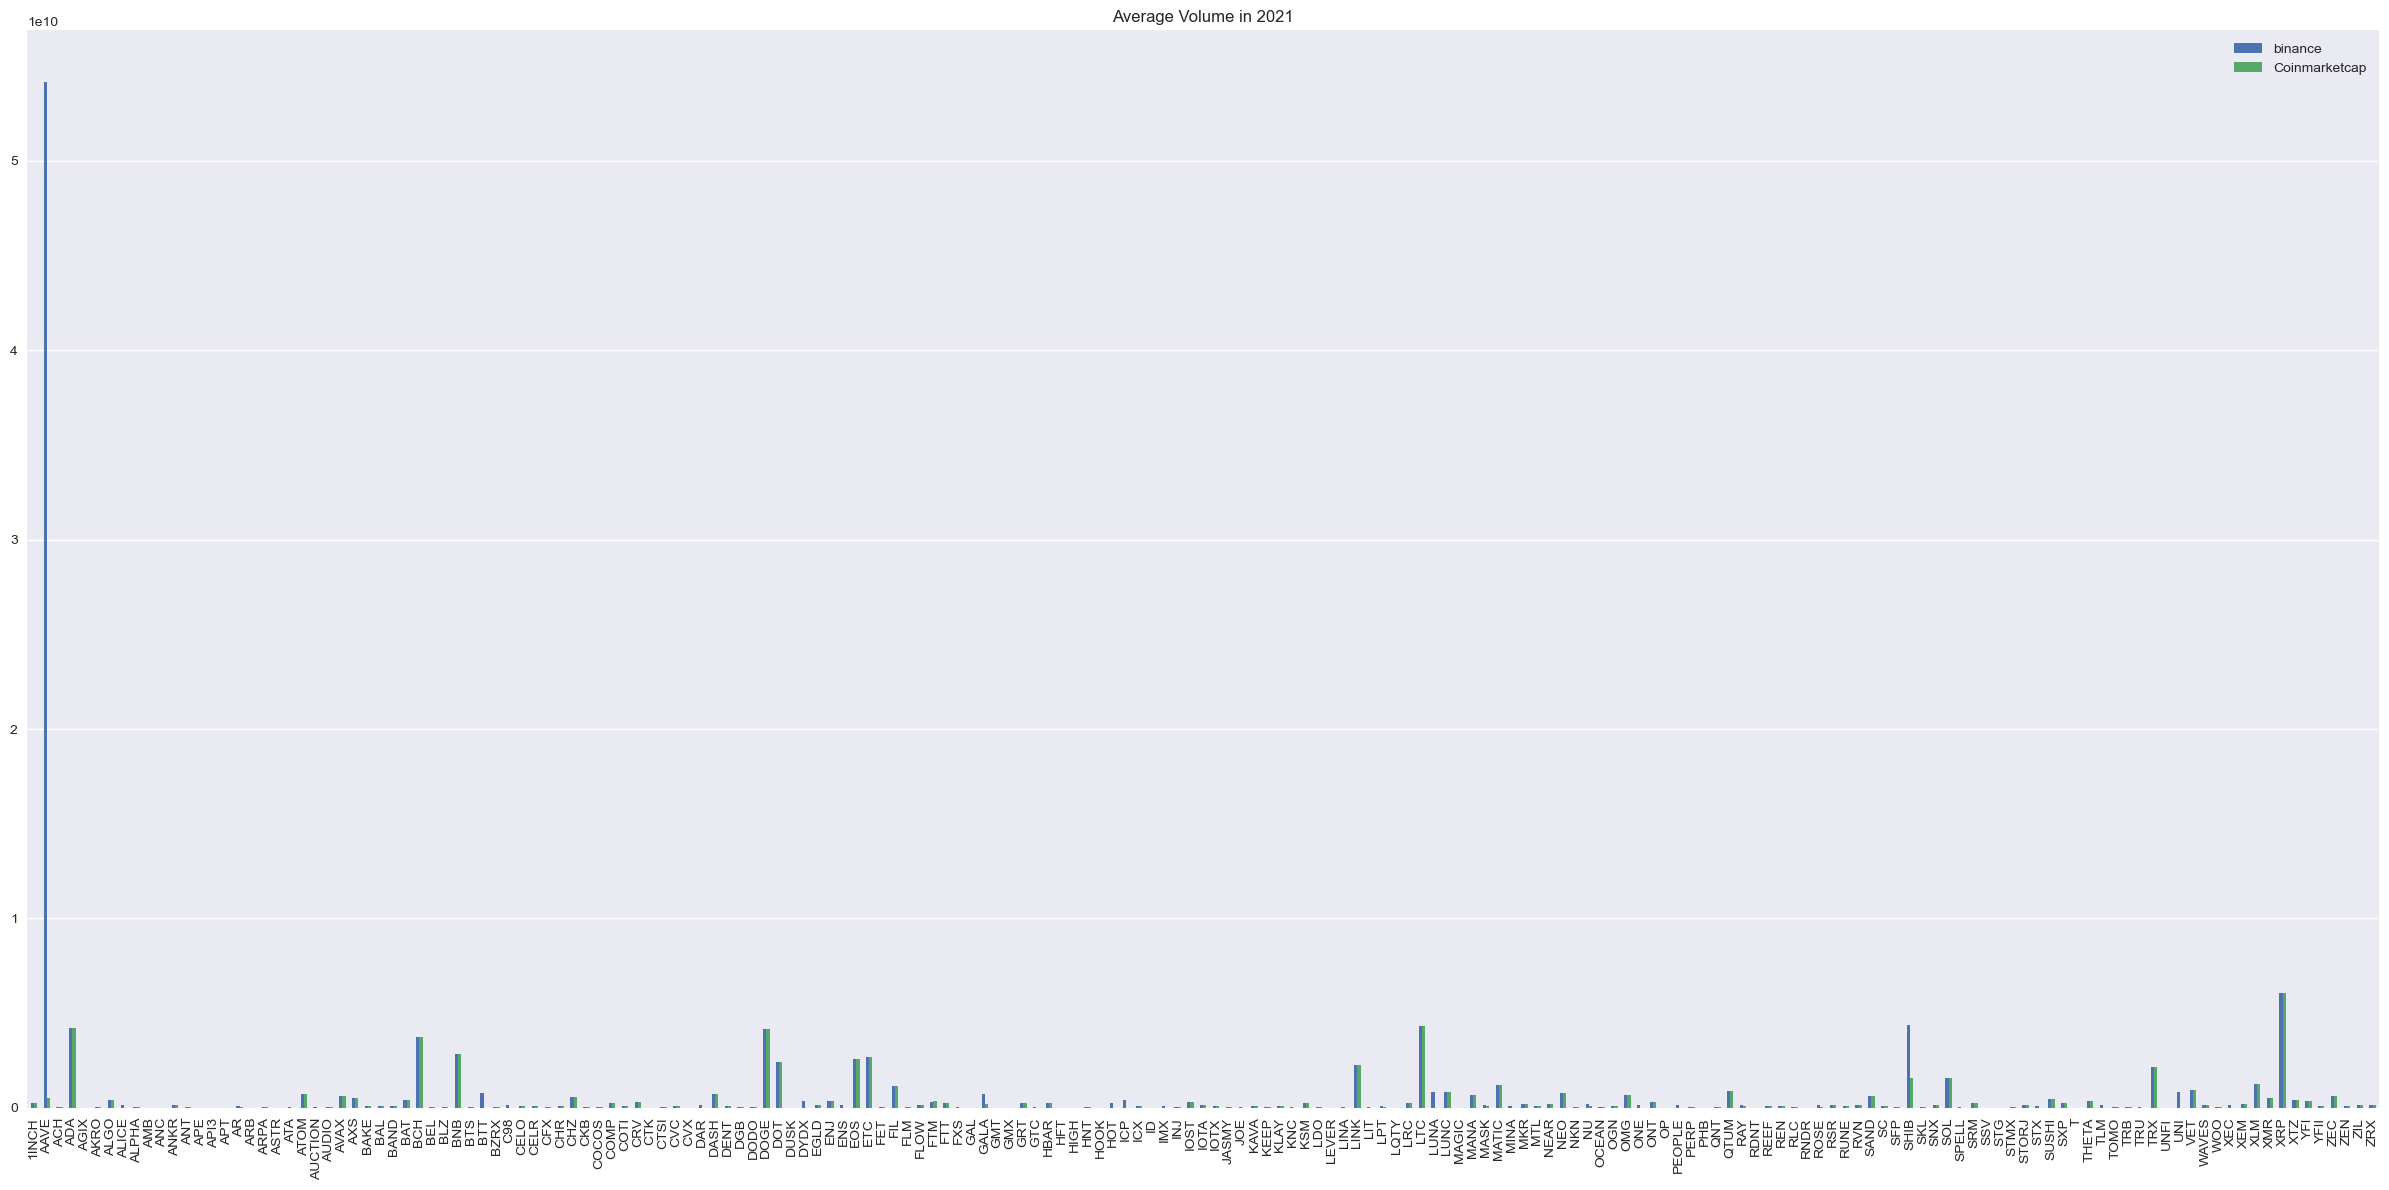

<Figure size 800x550 with 0 Axes>

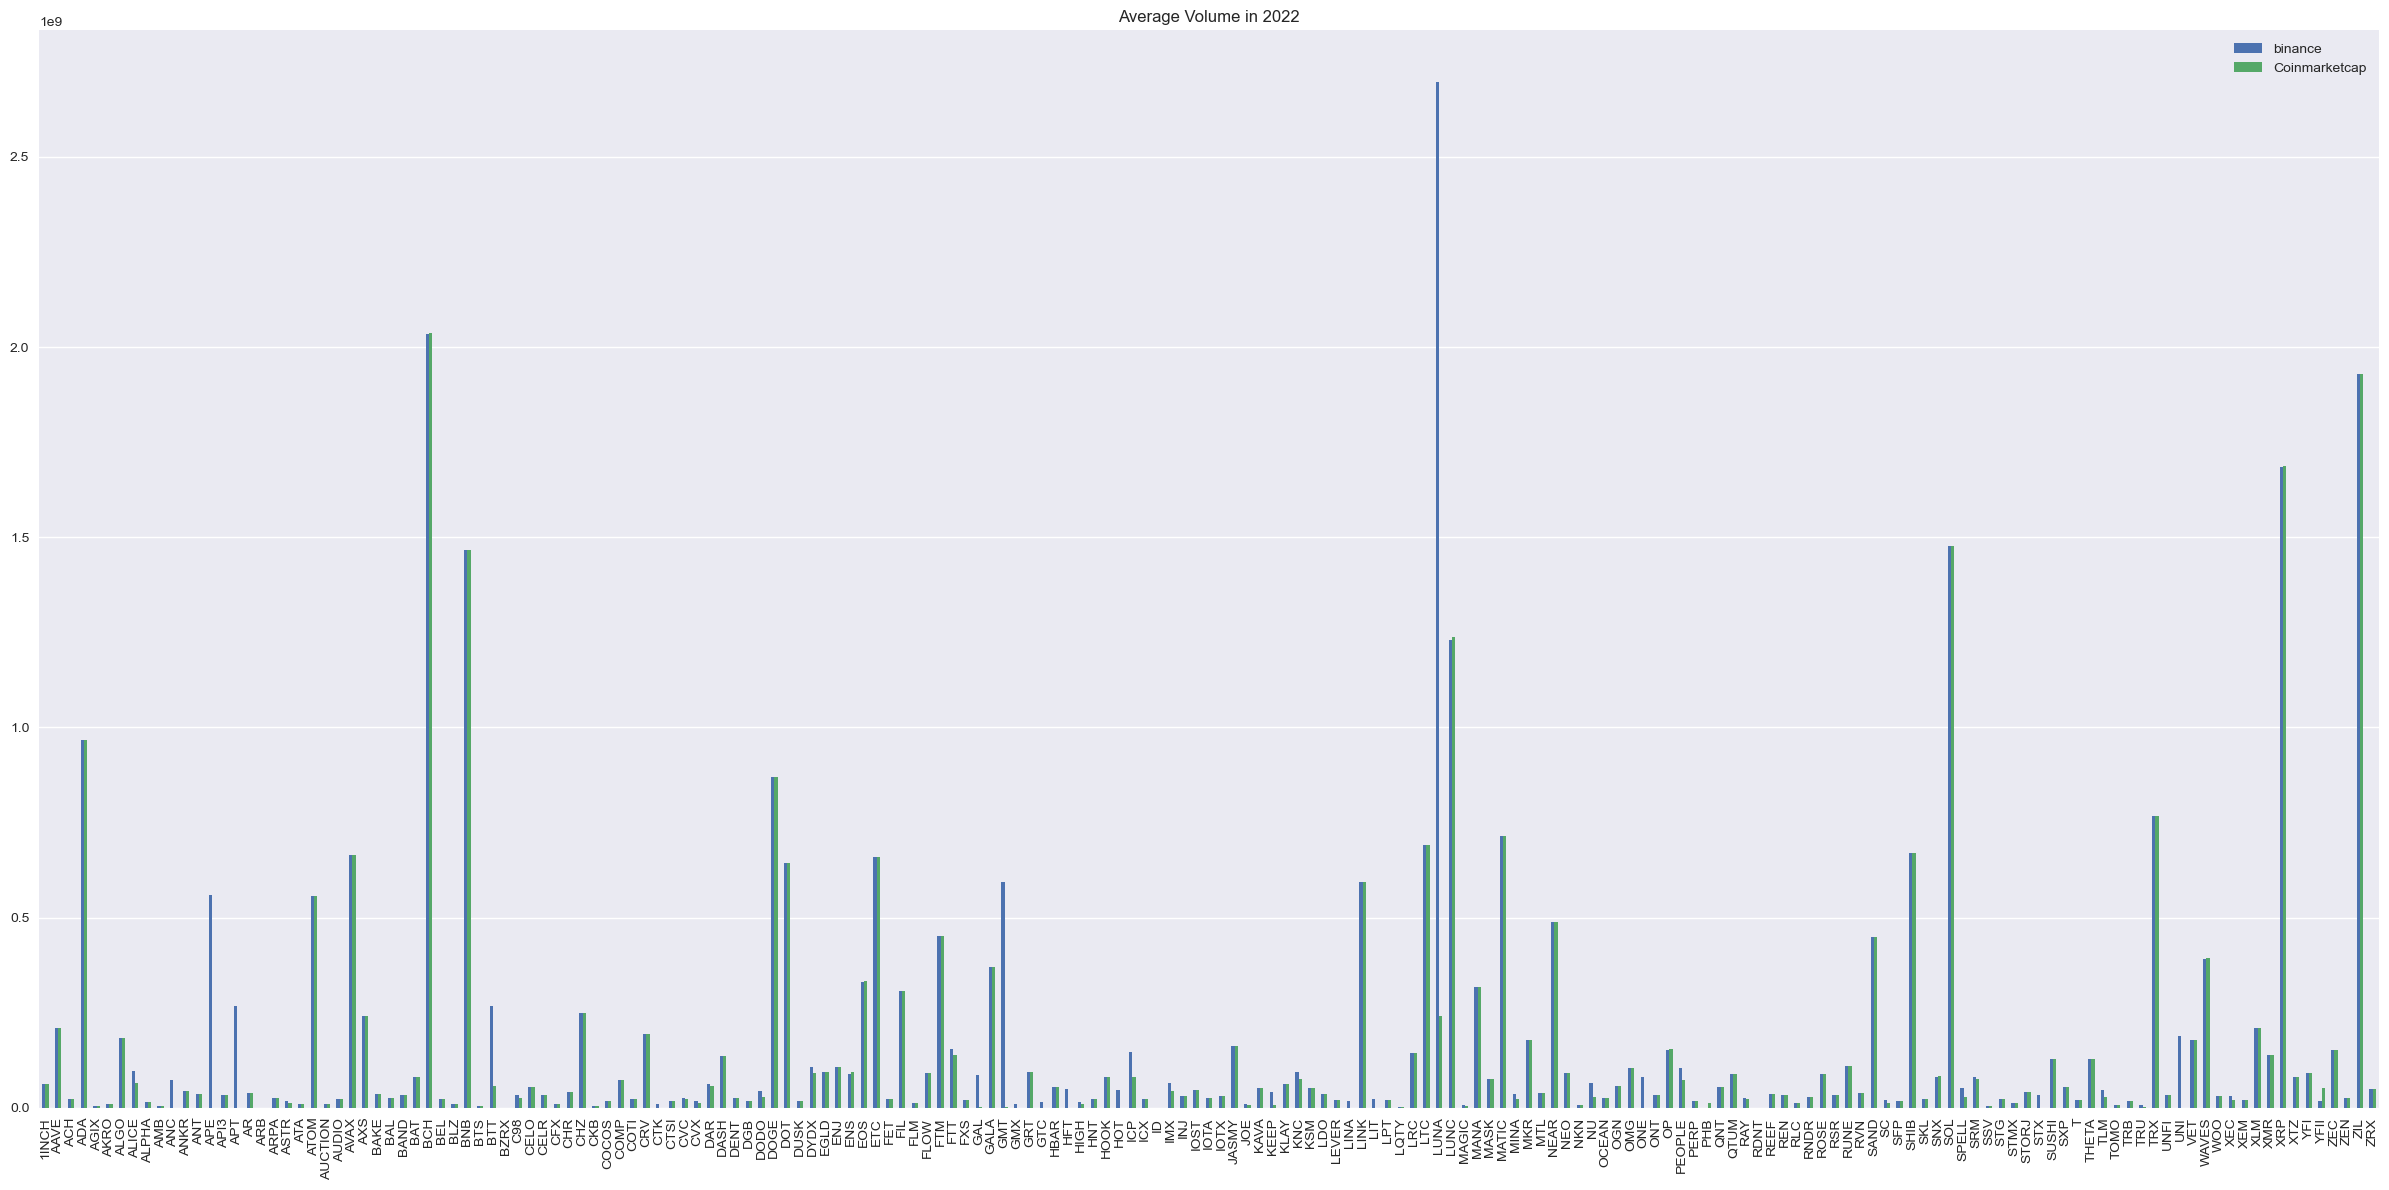

<Figure size 800x550 with 0 Axes>

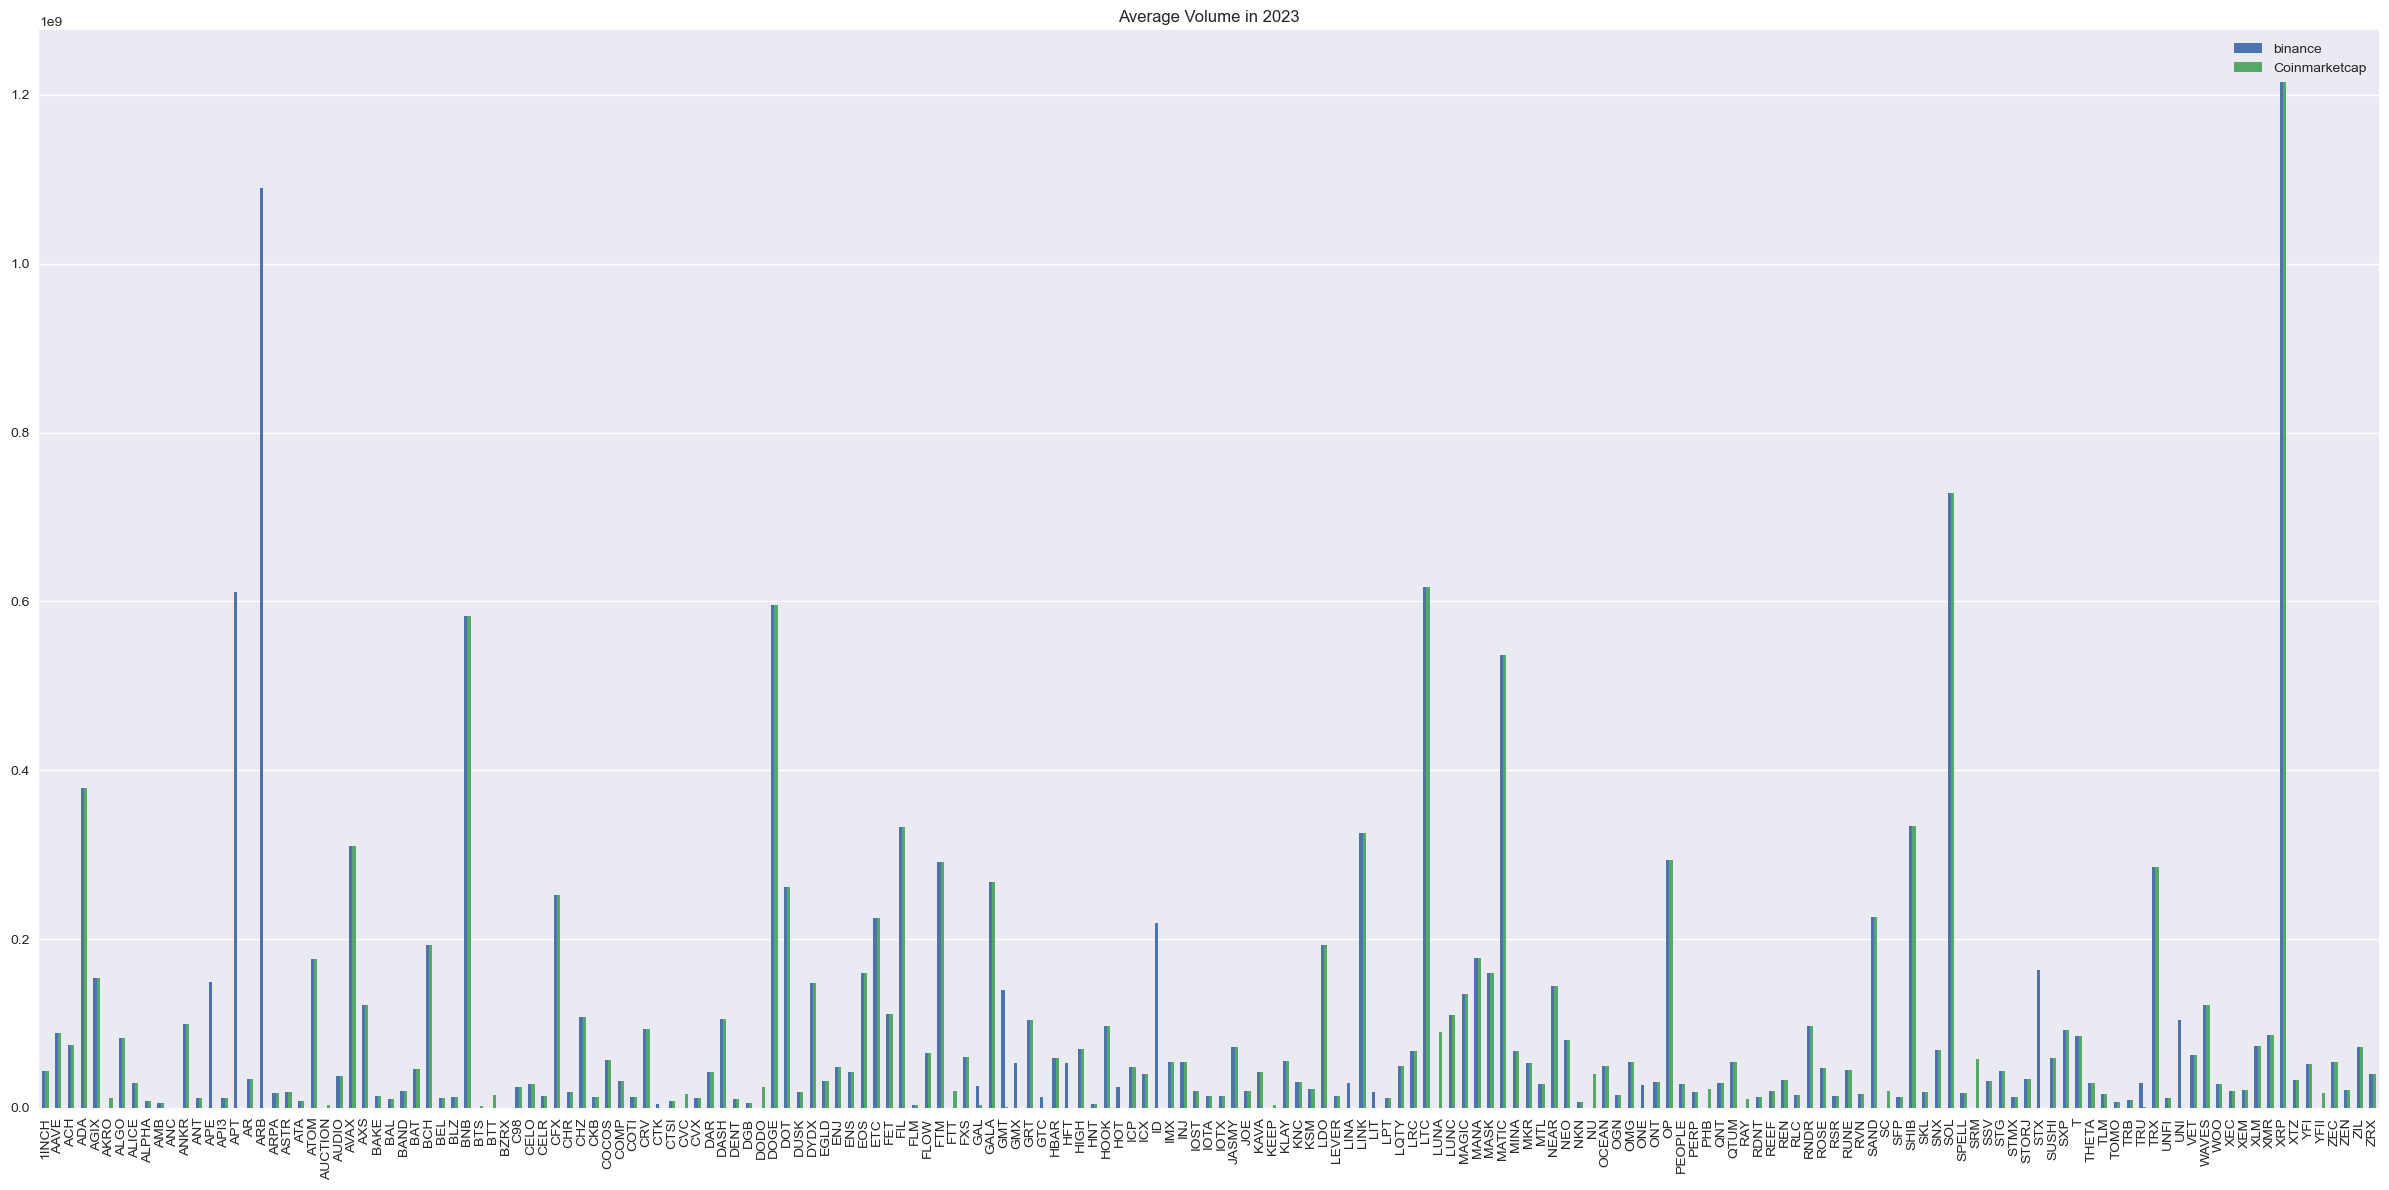

In [16]:
for year in range(2014,2024):
    plt.figure()
    
    year = str(year)
    concat = pd.concat([binance.vol.loc[year].mean(),c_vol.loc[year].mean()],
                        axis=1, 
                        keys=["binance","Coinmarketcap"])
    concat.drop(["BTC","ETH"]).plot(figsize=(24,12), 
                            kind="bar", 
                            title=f"Average Volume in {year}")
    plt.grid(axis="x")
    plt.tight_layout()

<Figure size 800x550 with 0 Axes>

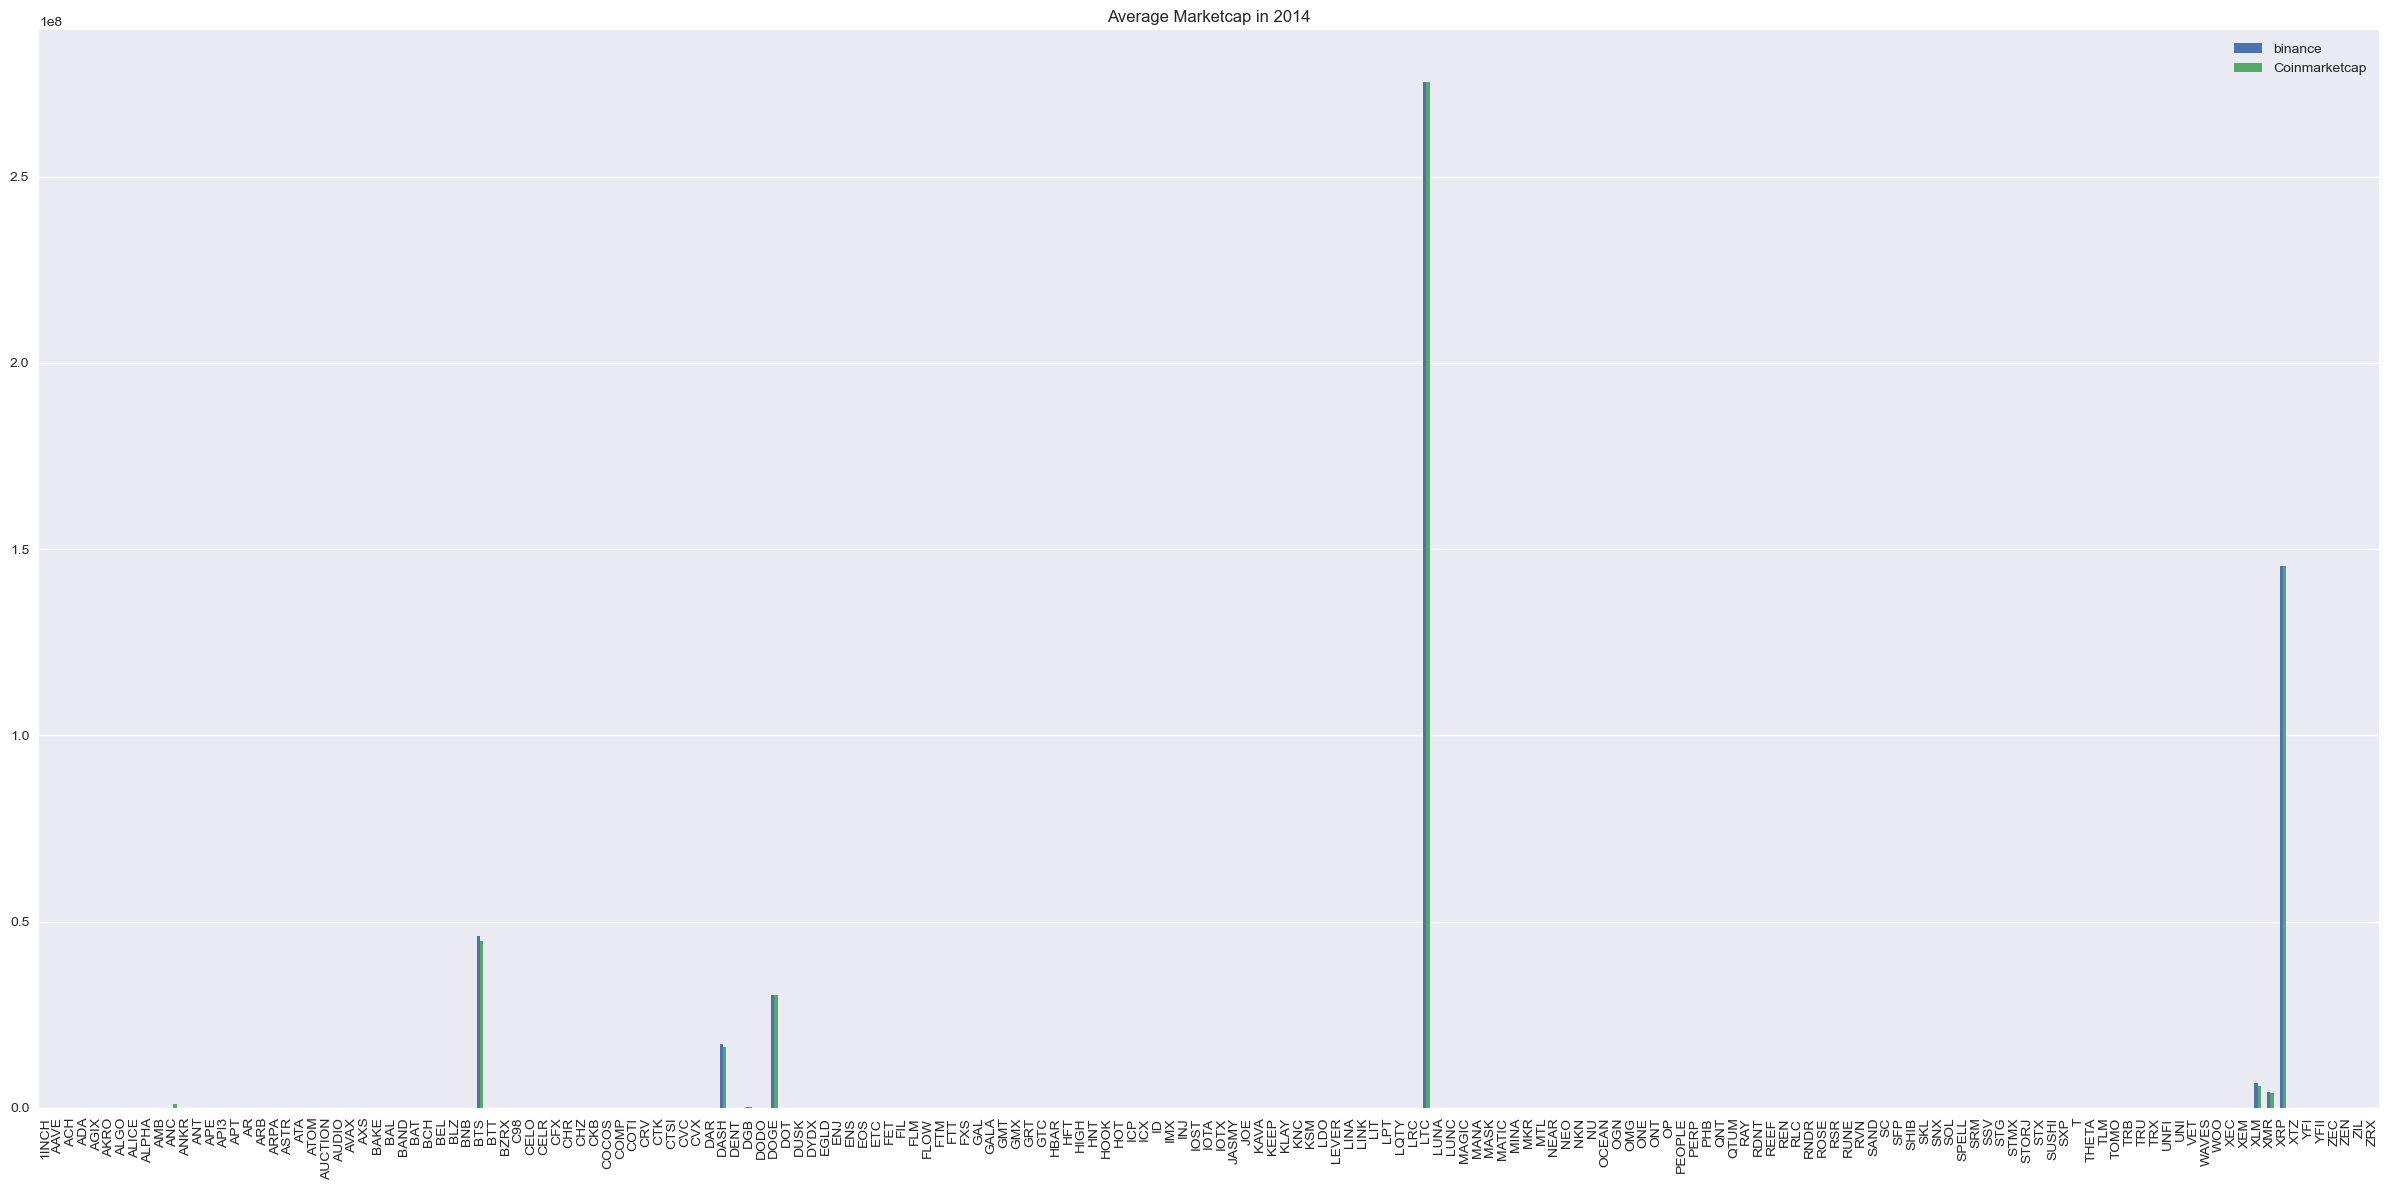

<Figure size 800x550 with 0 Axes>

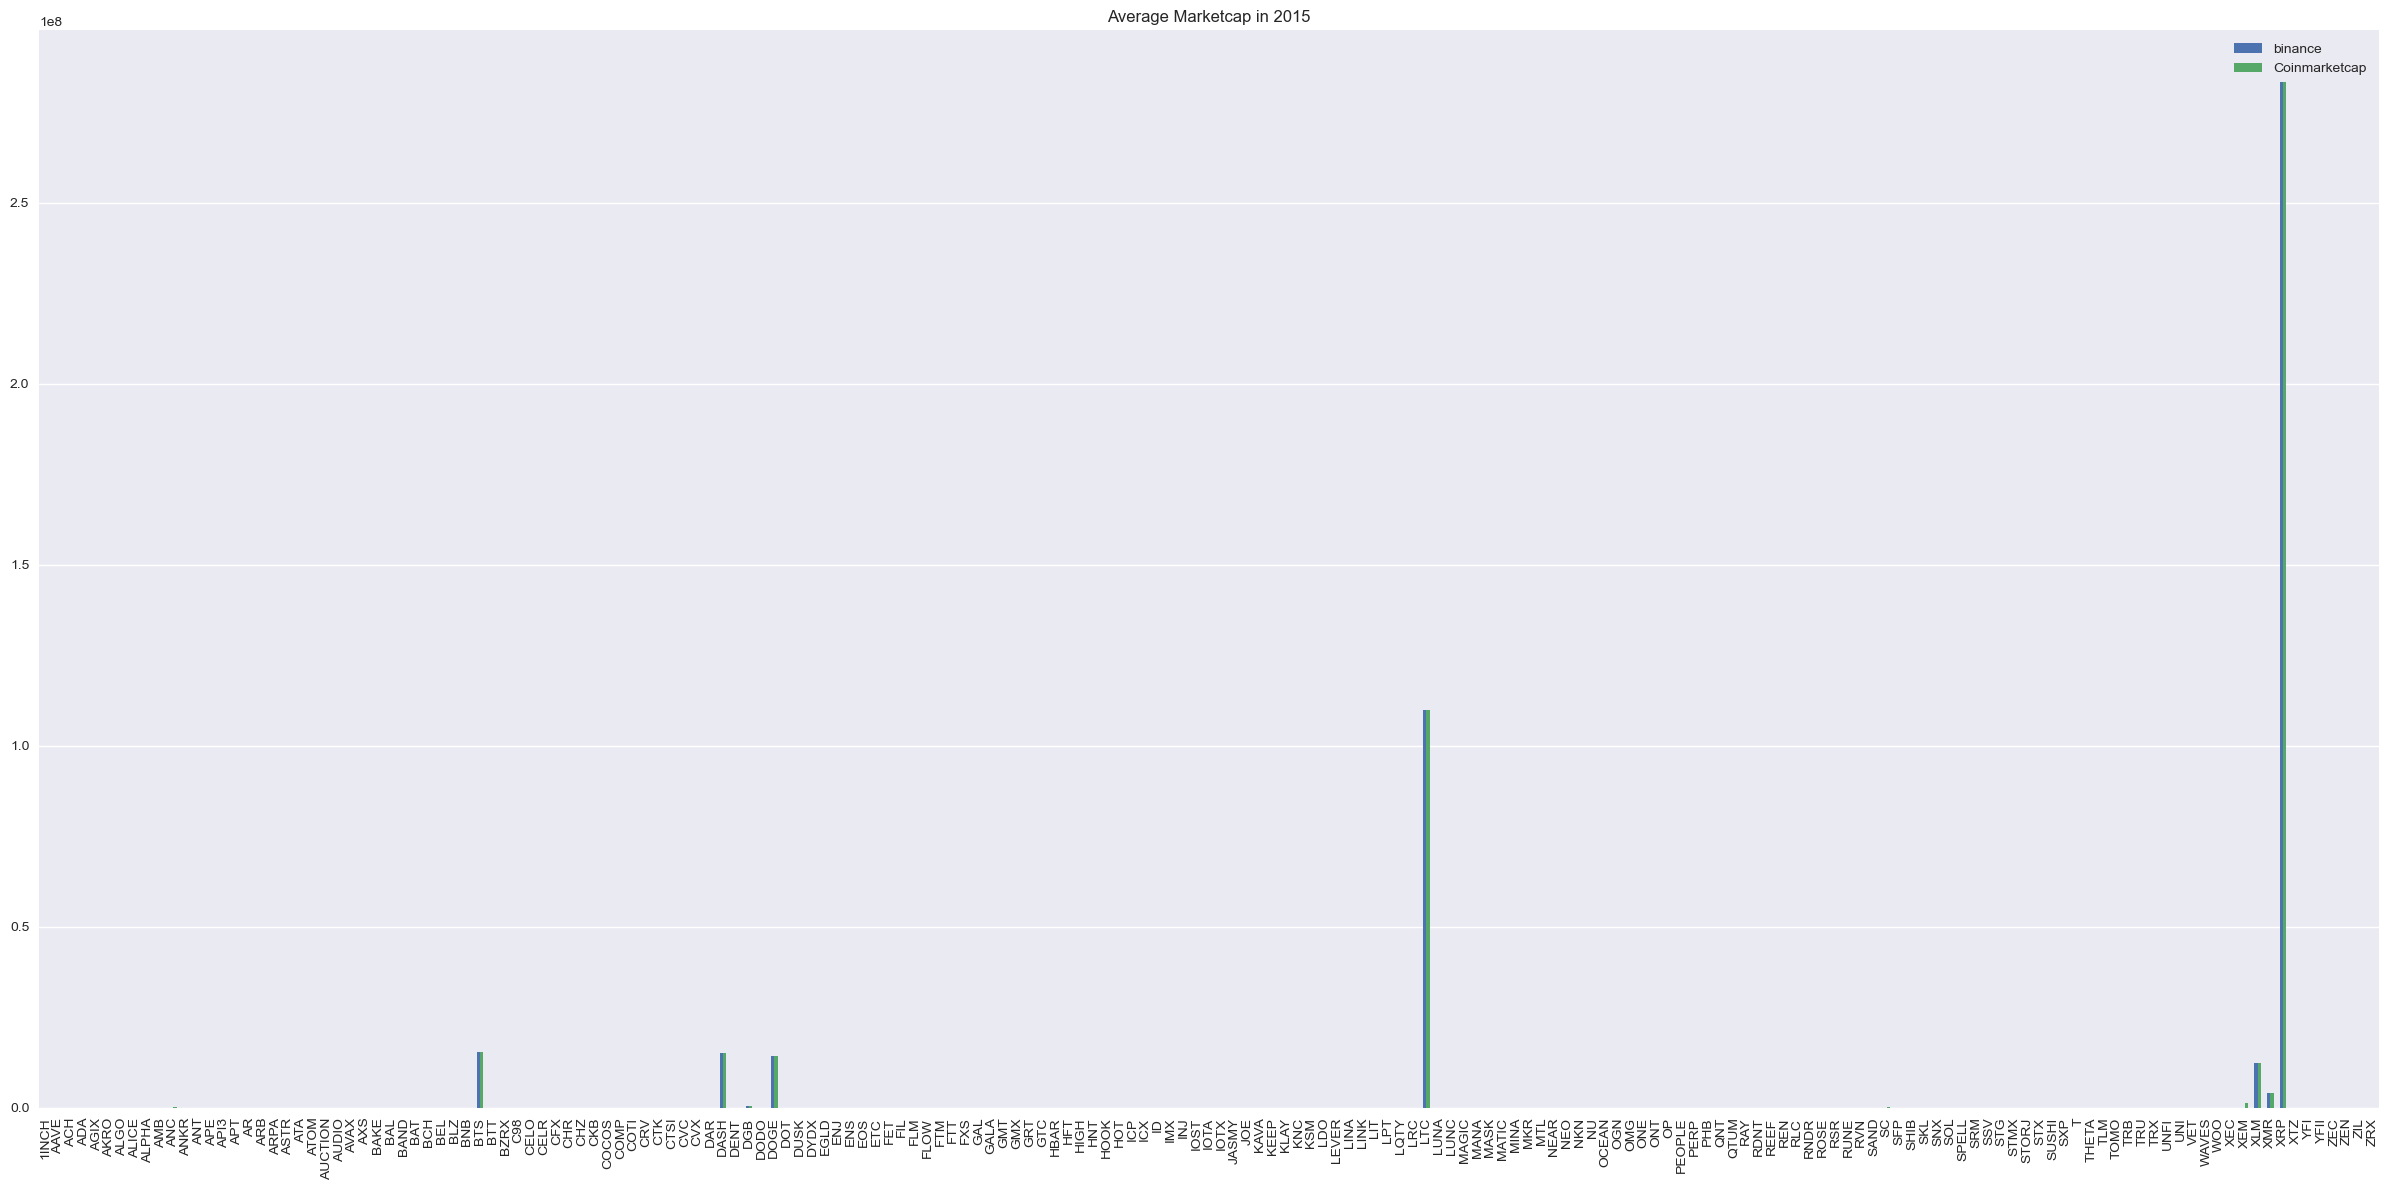

<Figure size 800x550 with 0 Axes>

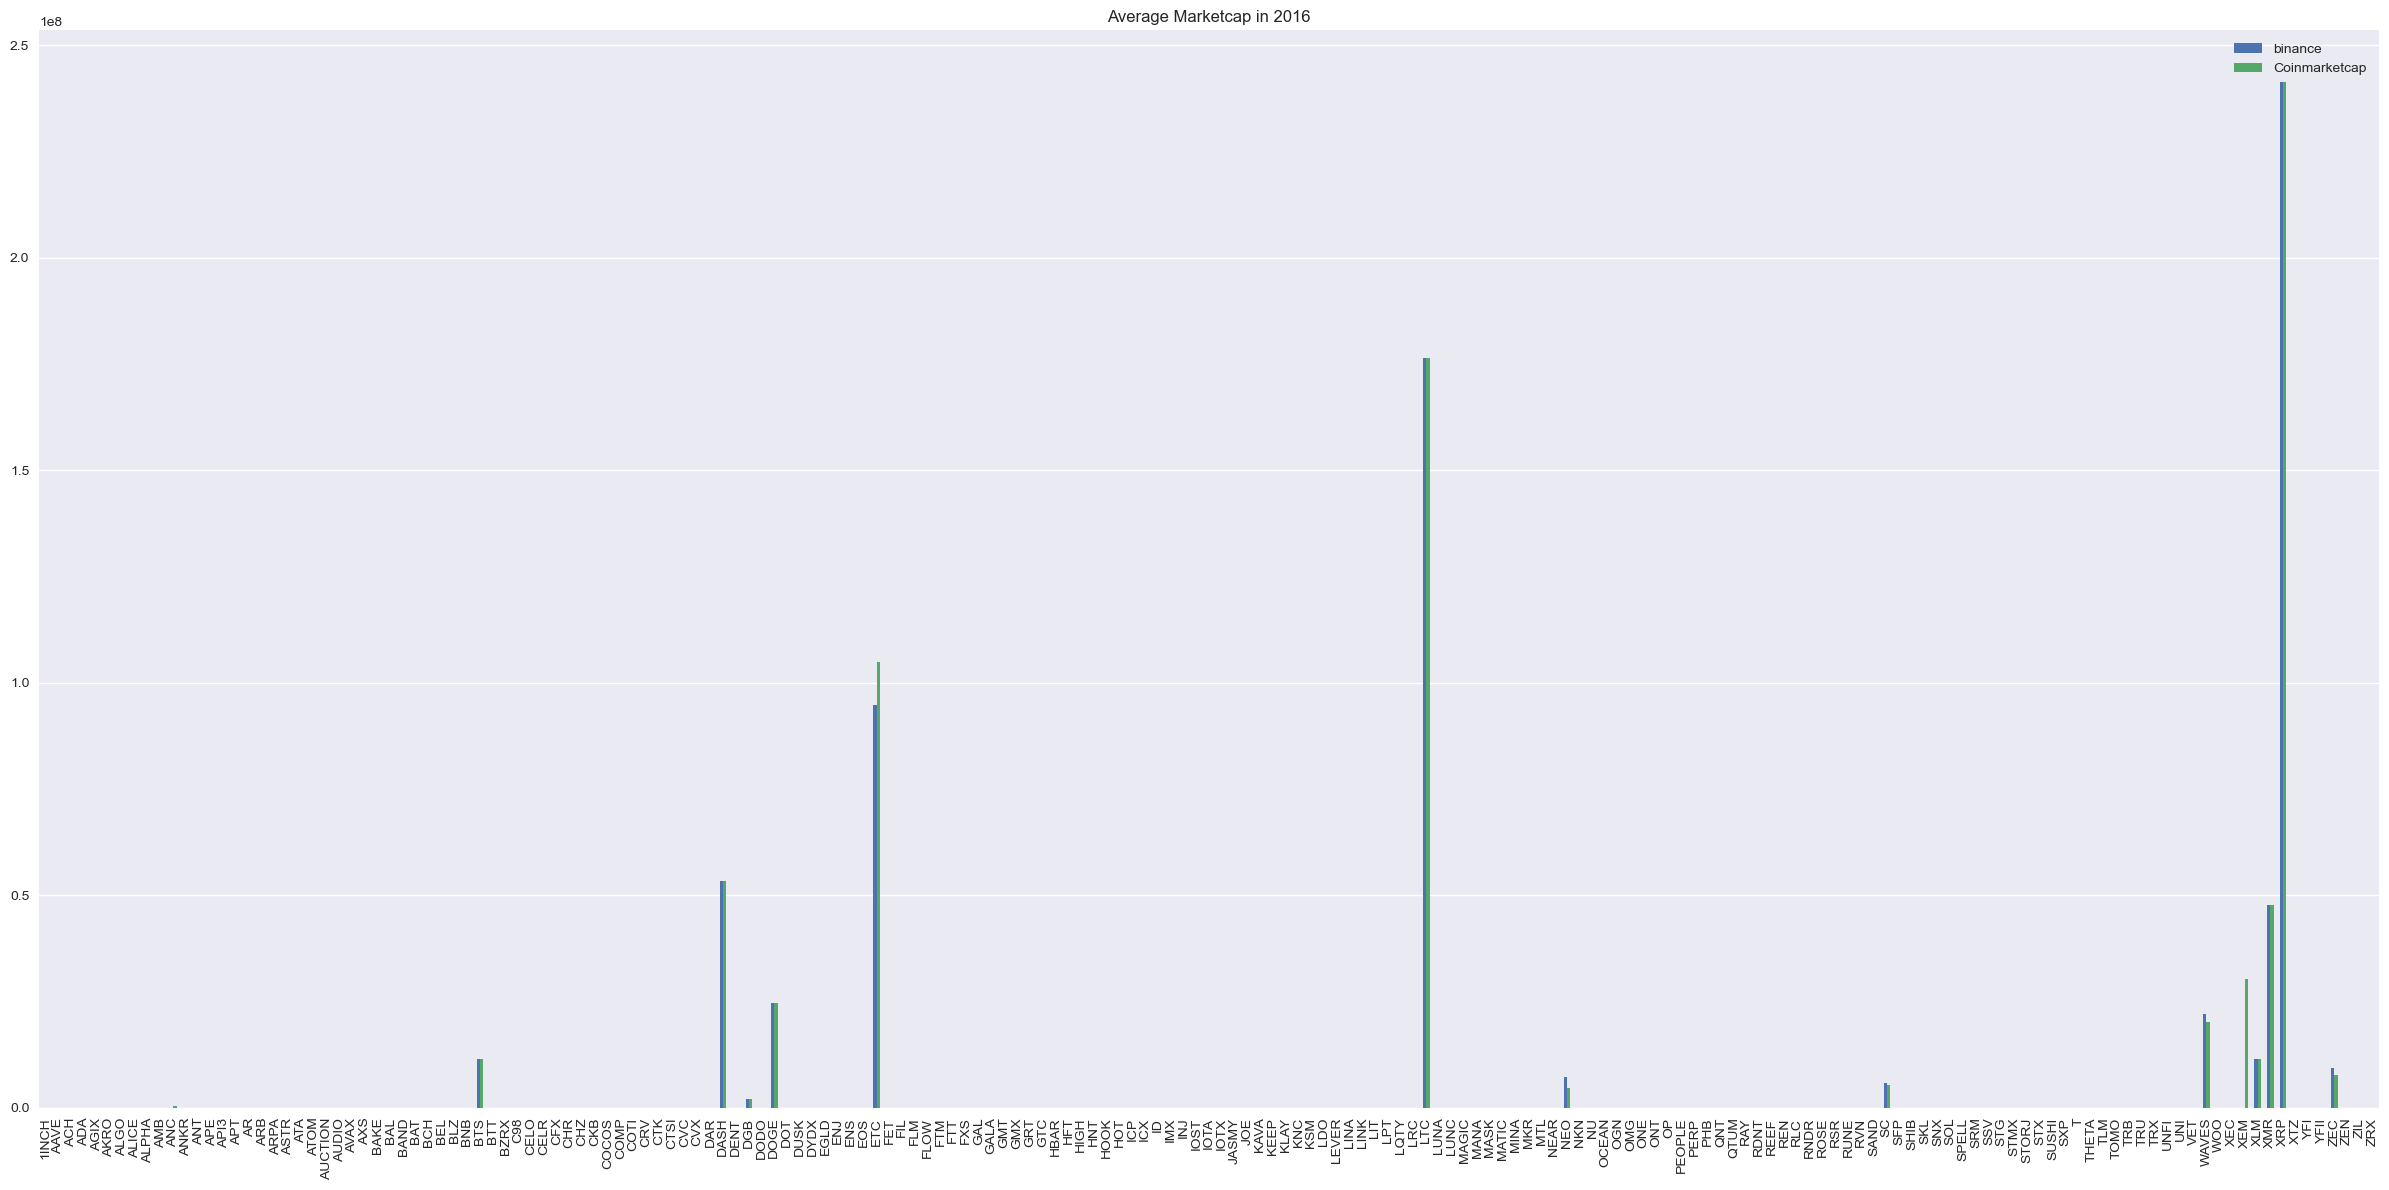

<Figure size 800x550 with 0 Axes>

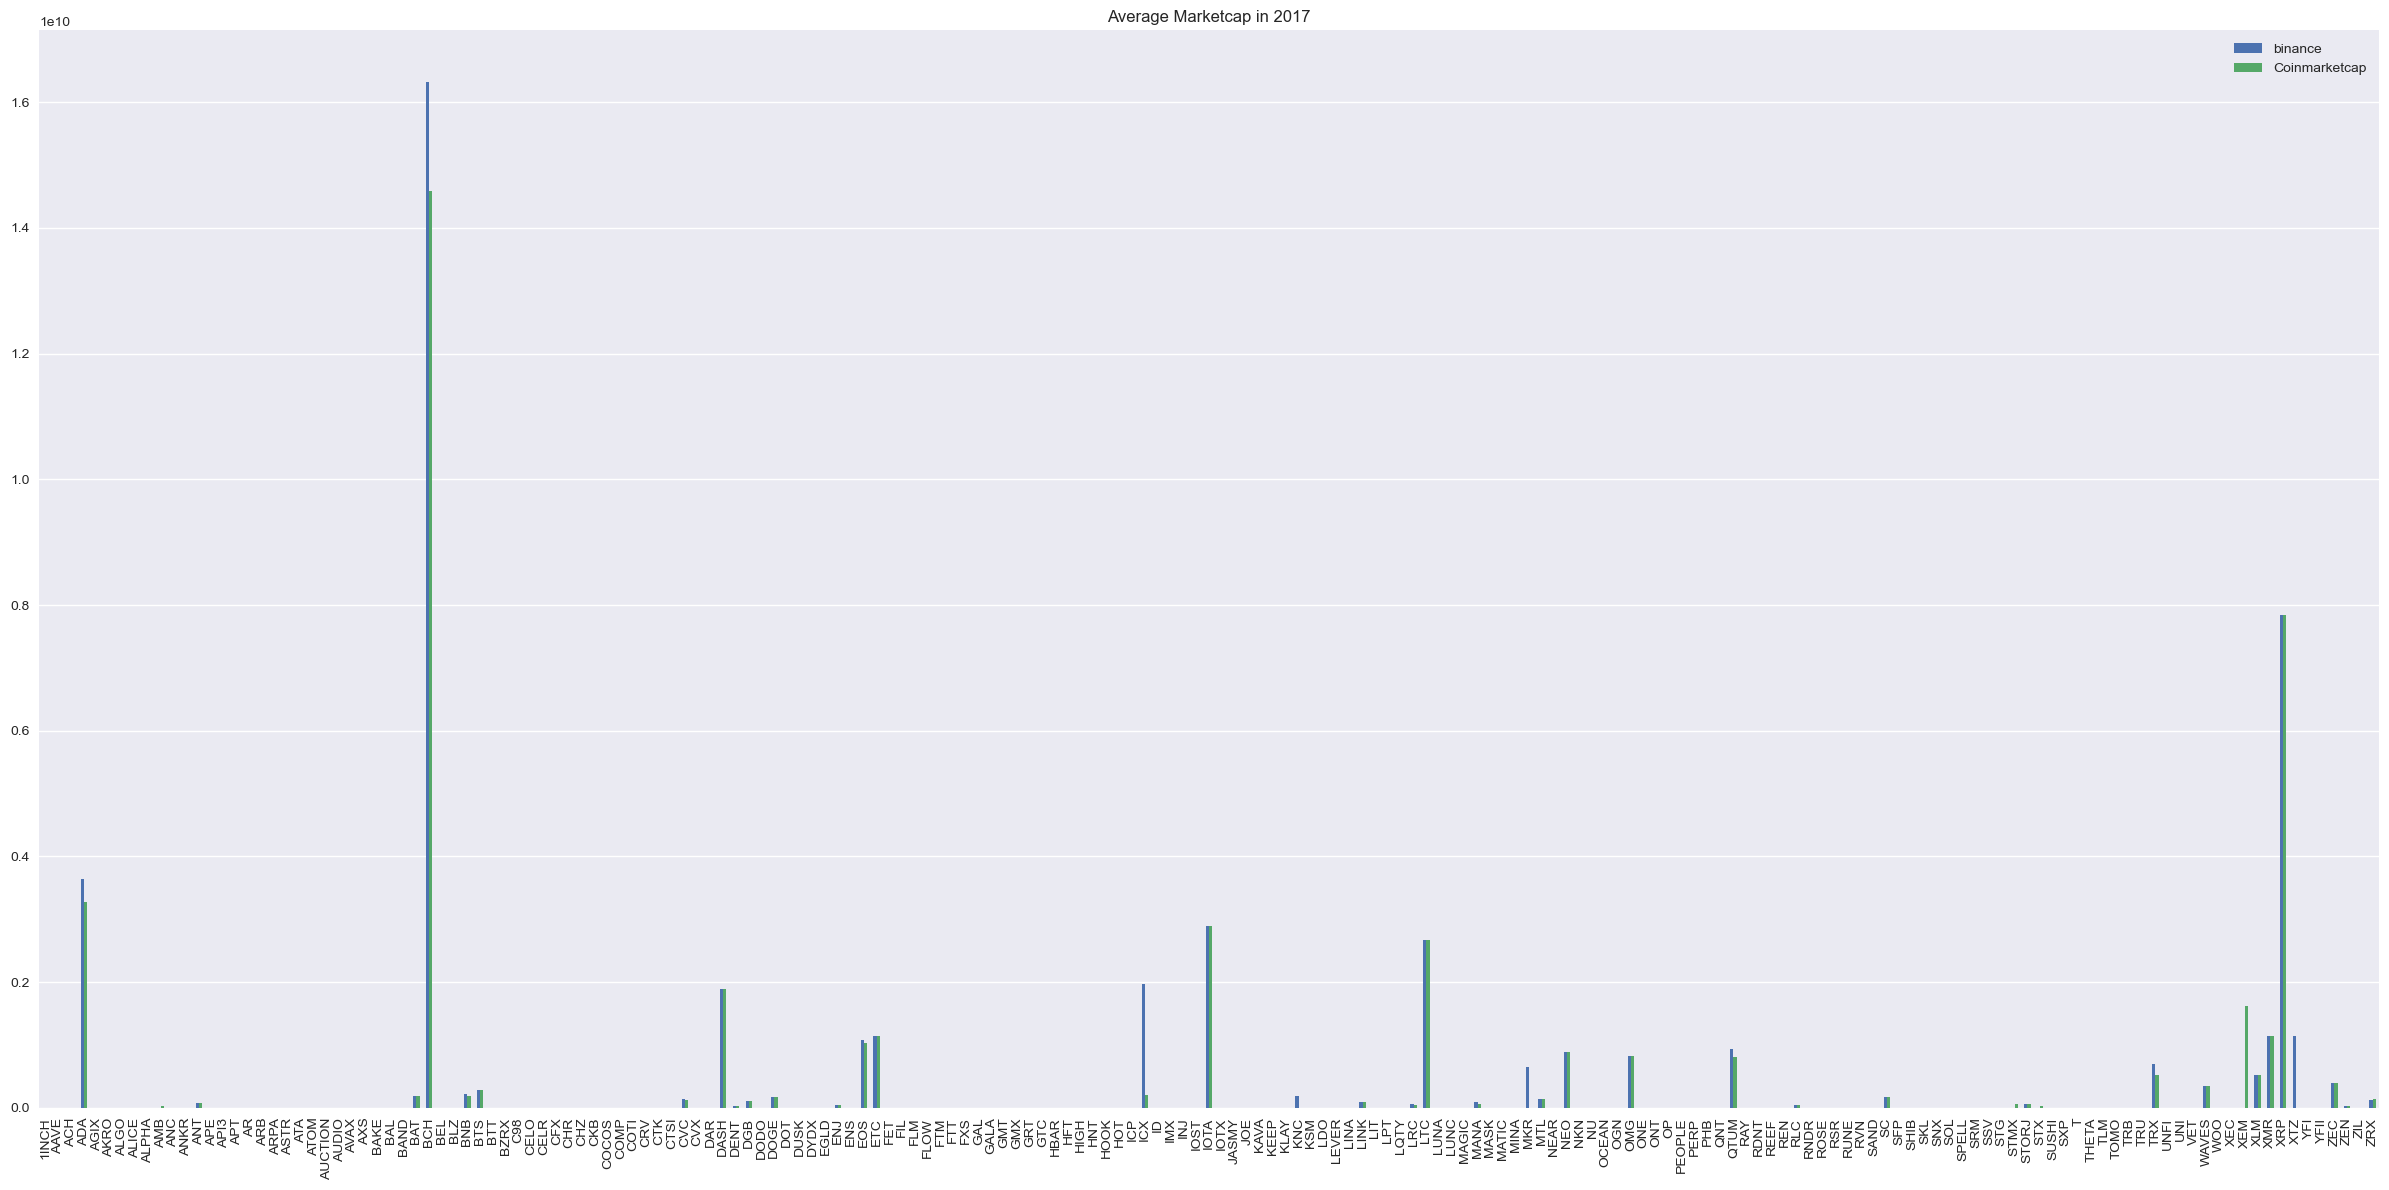

<Figure size 800x550 with 0 Axes>

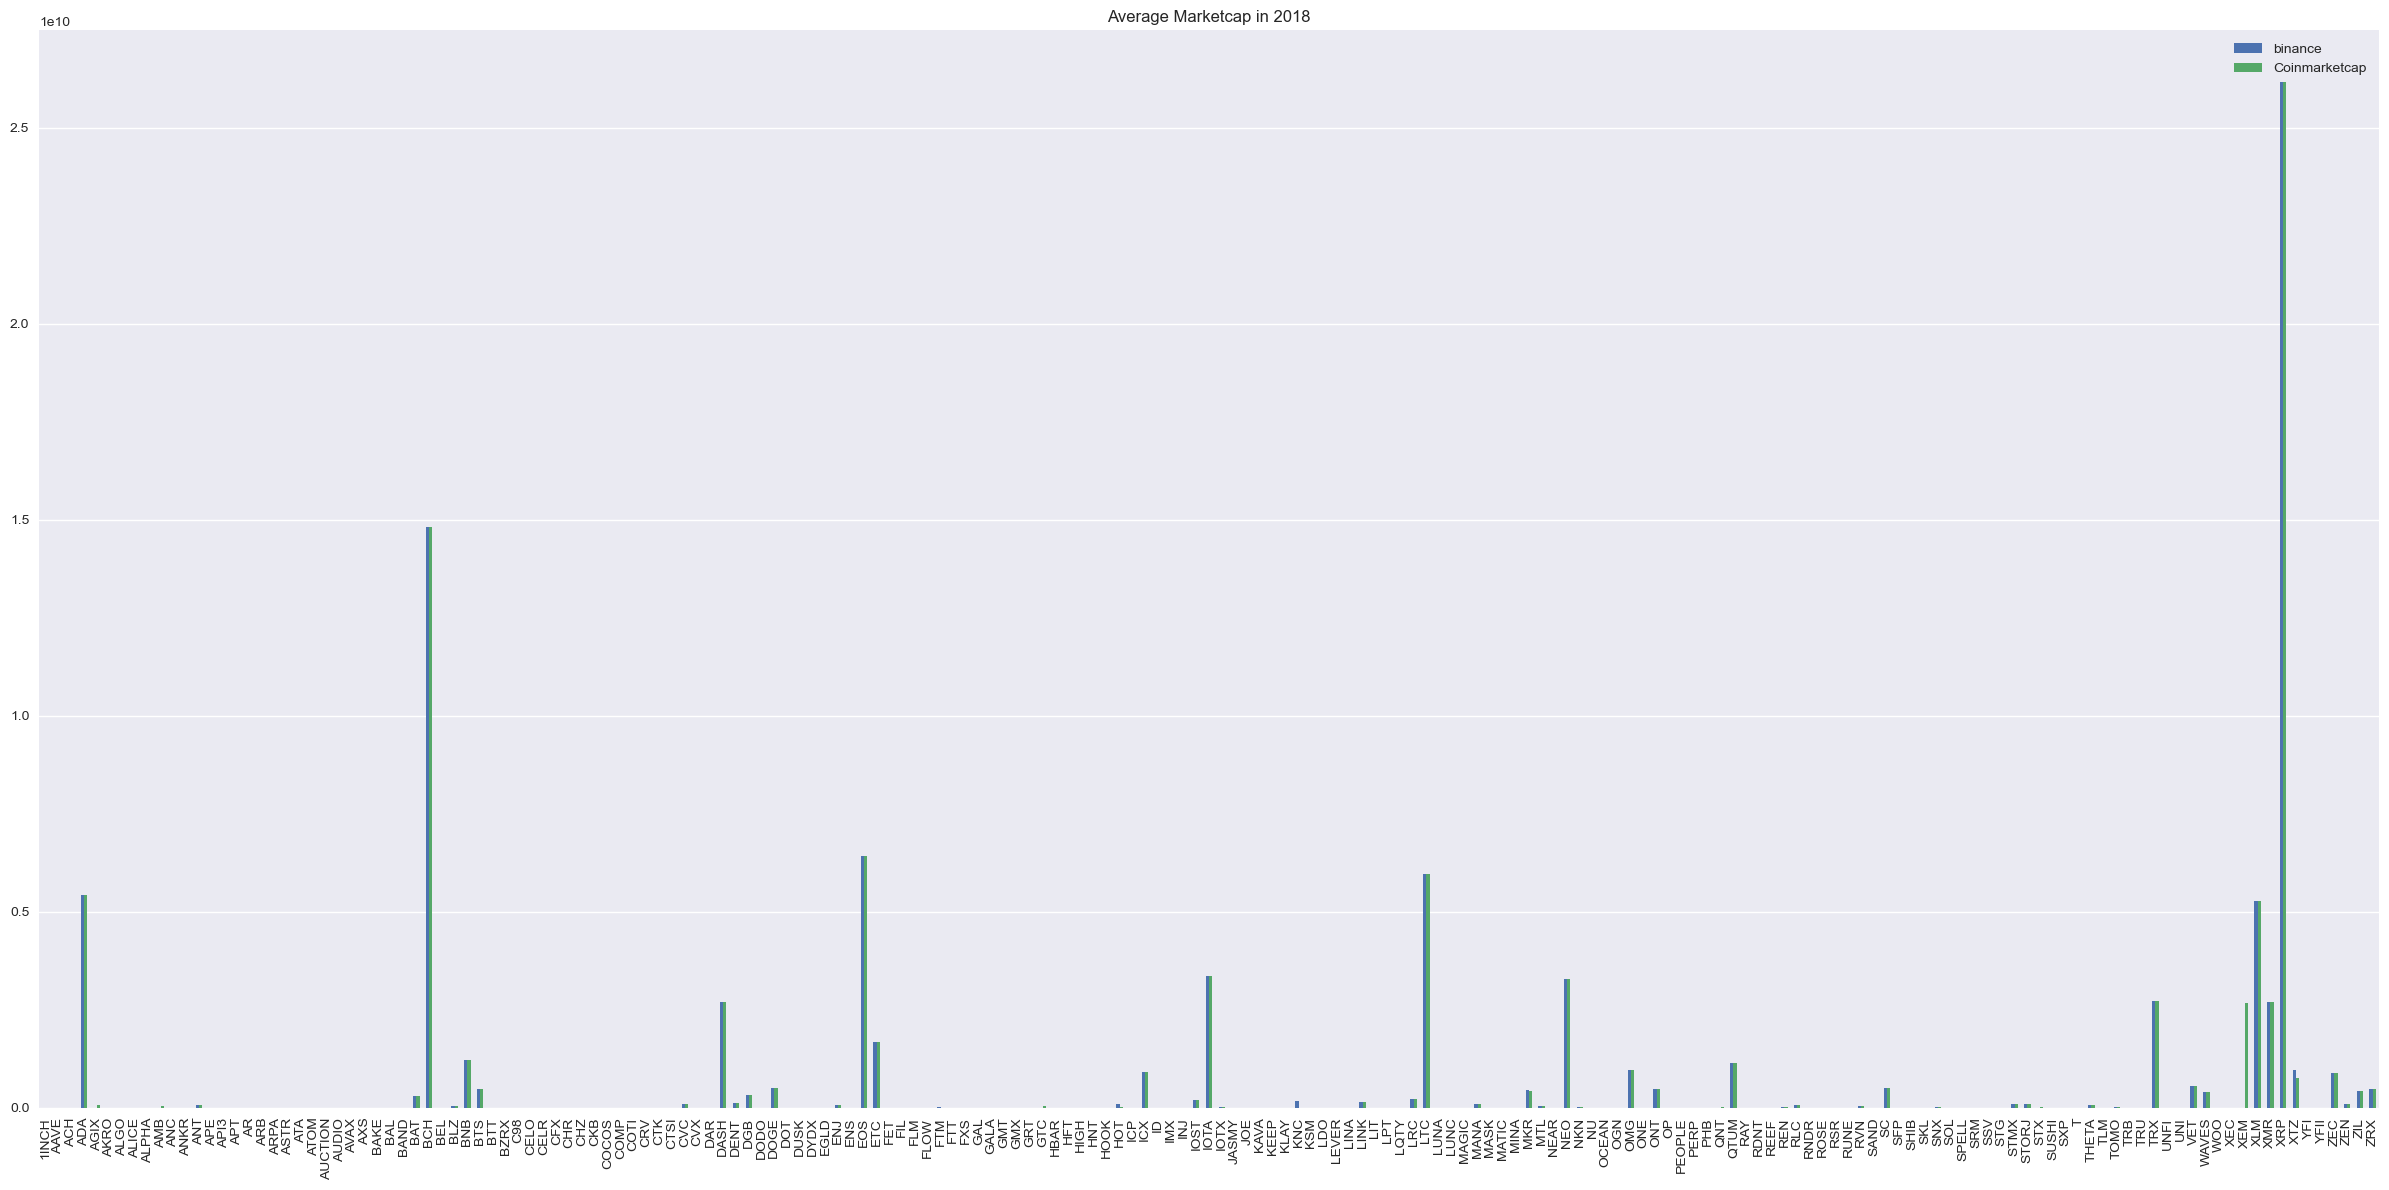

<Figure size 800x550 with 0 Axes>

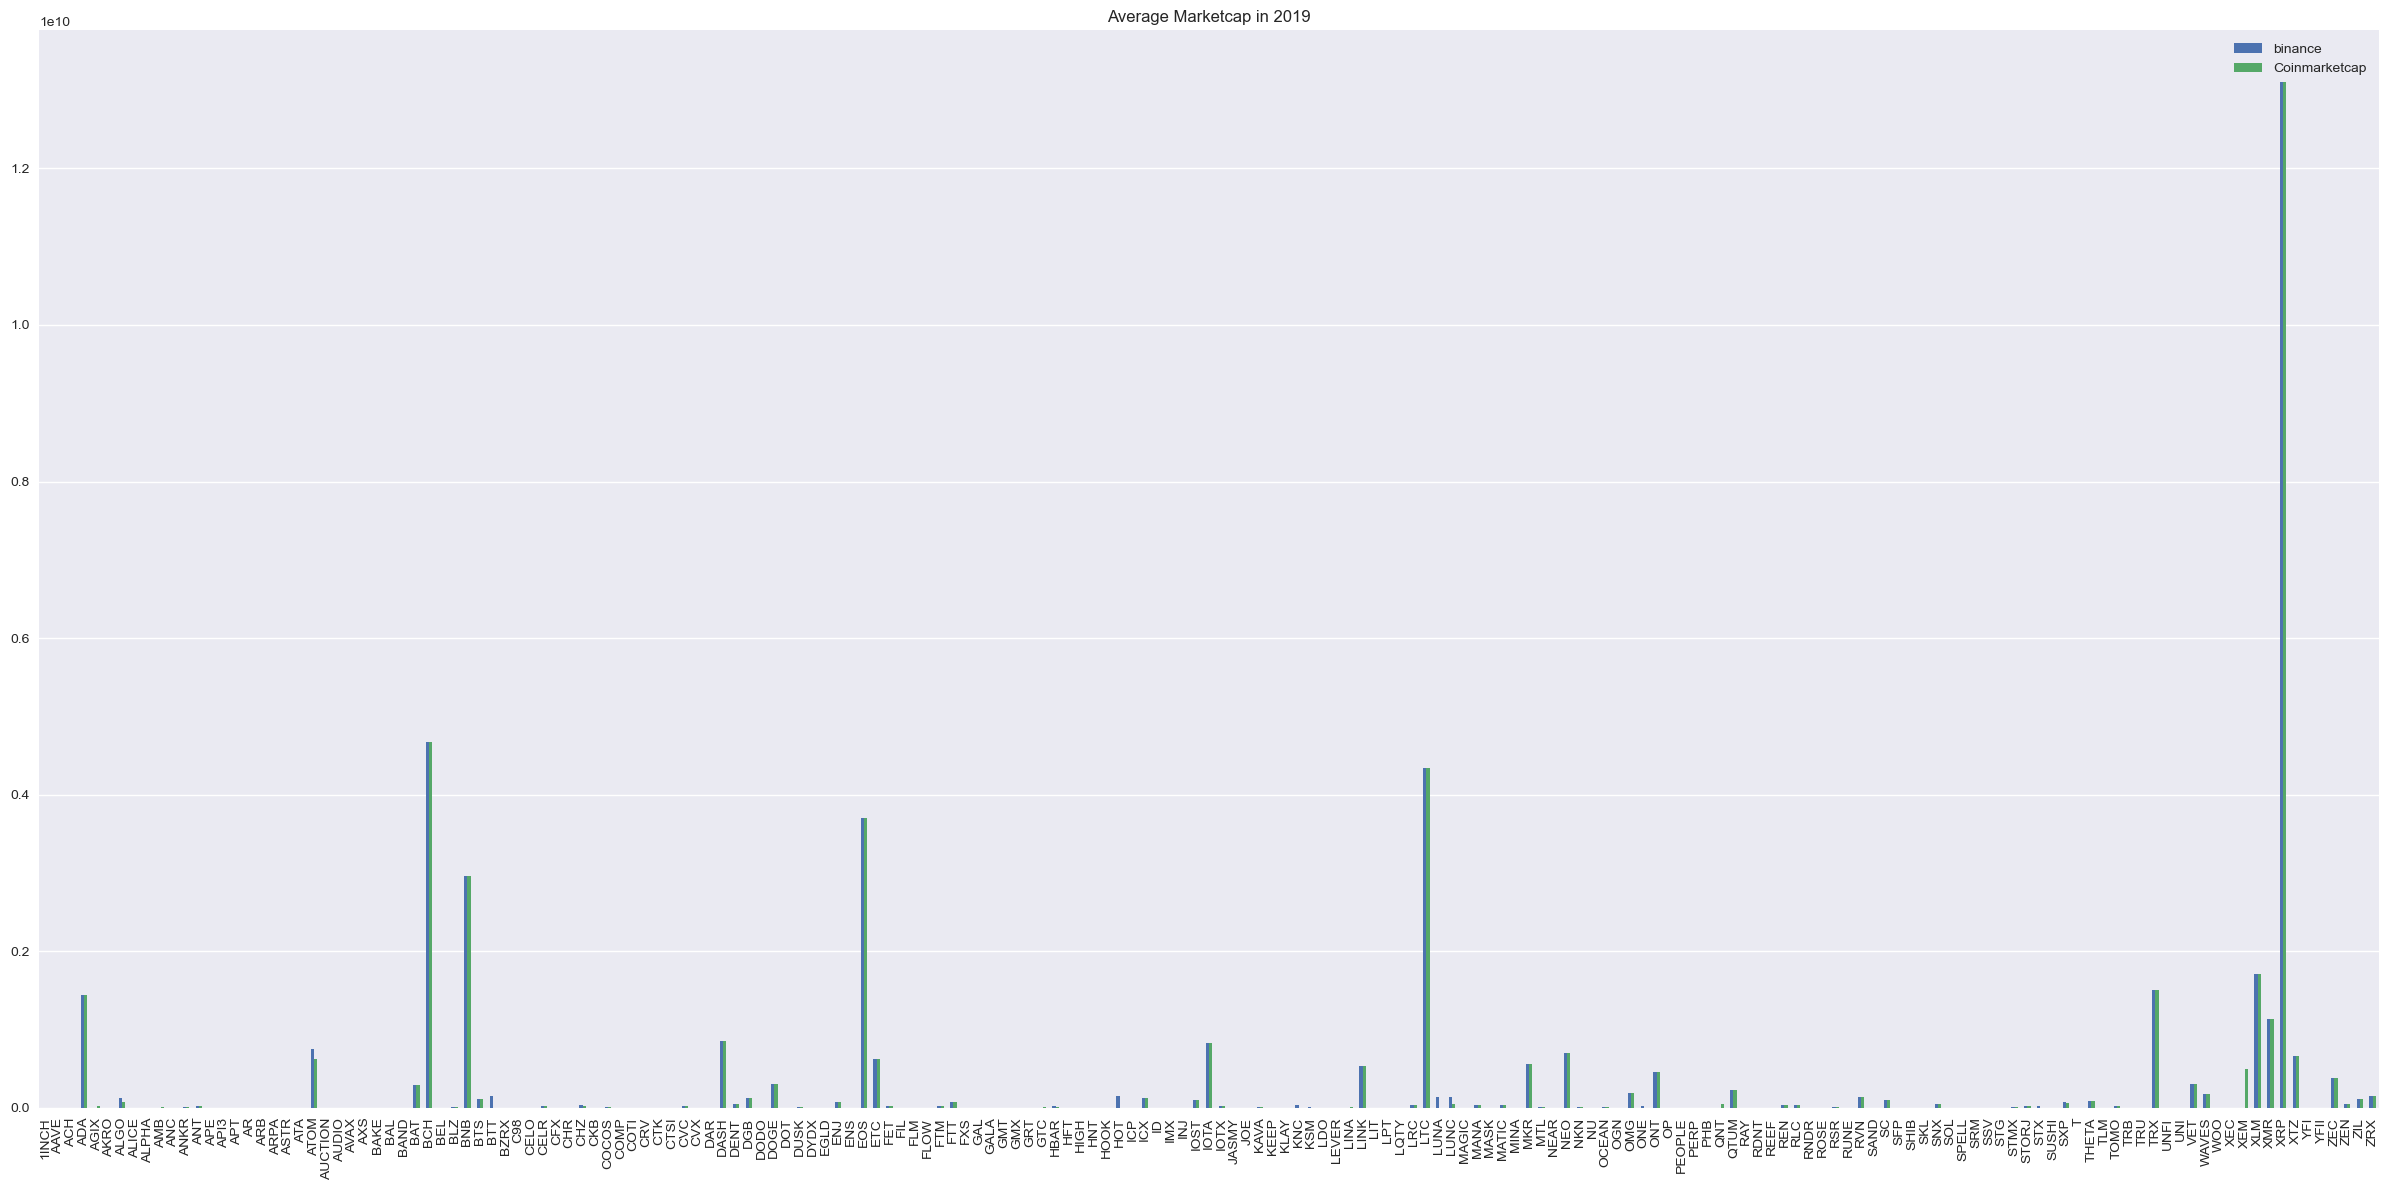

<Figure size 800x550 with 0 Axes>

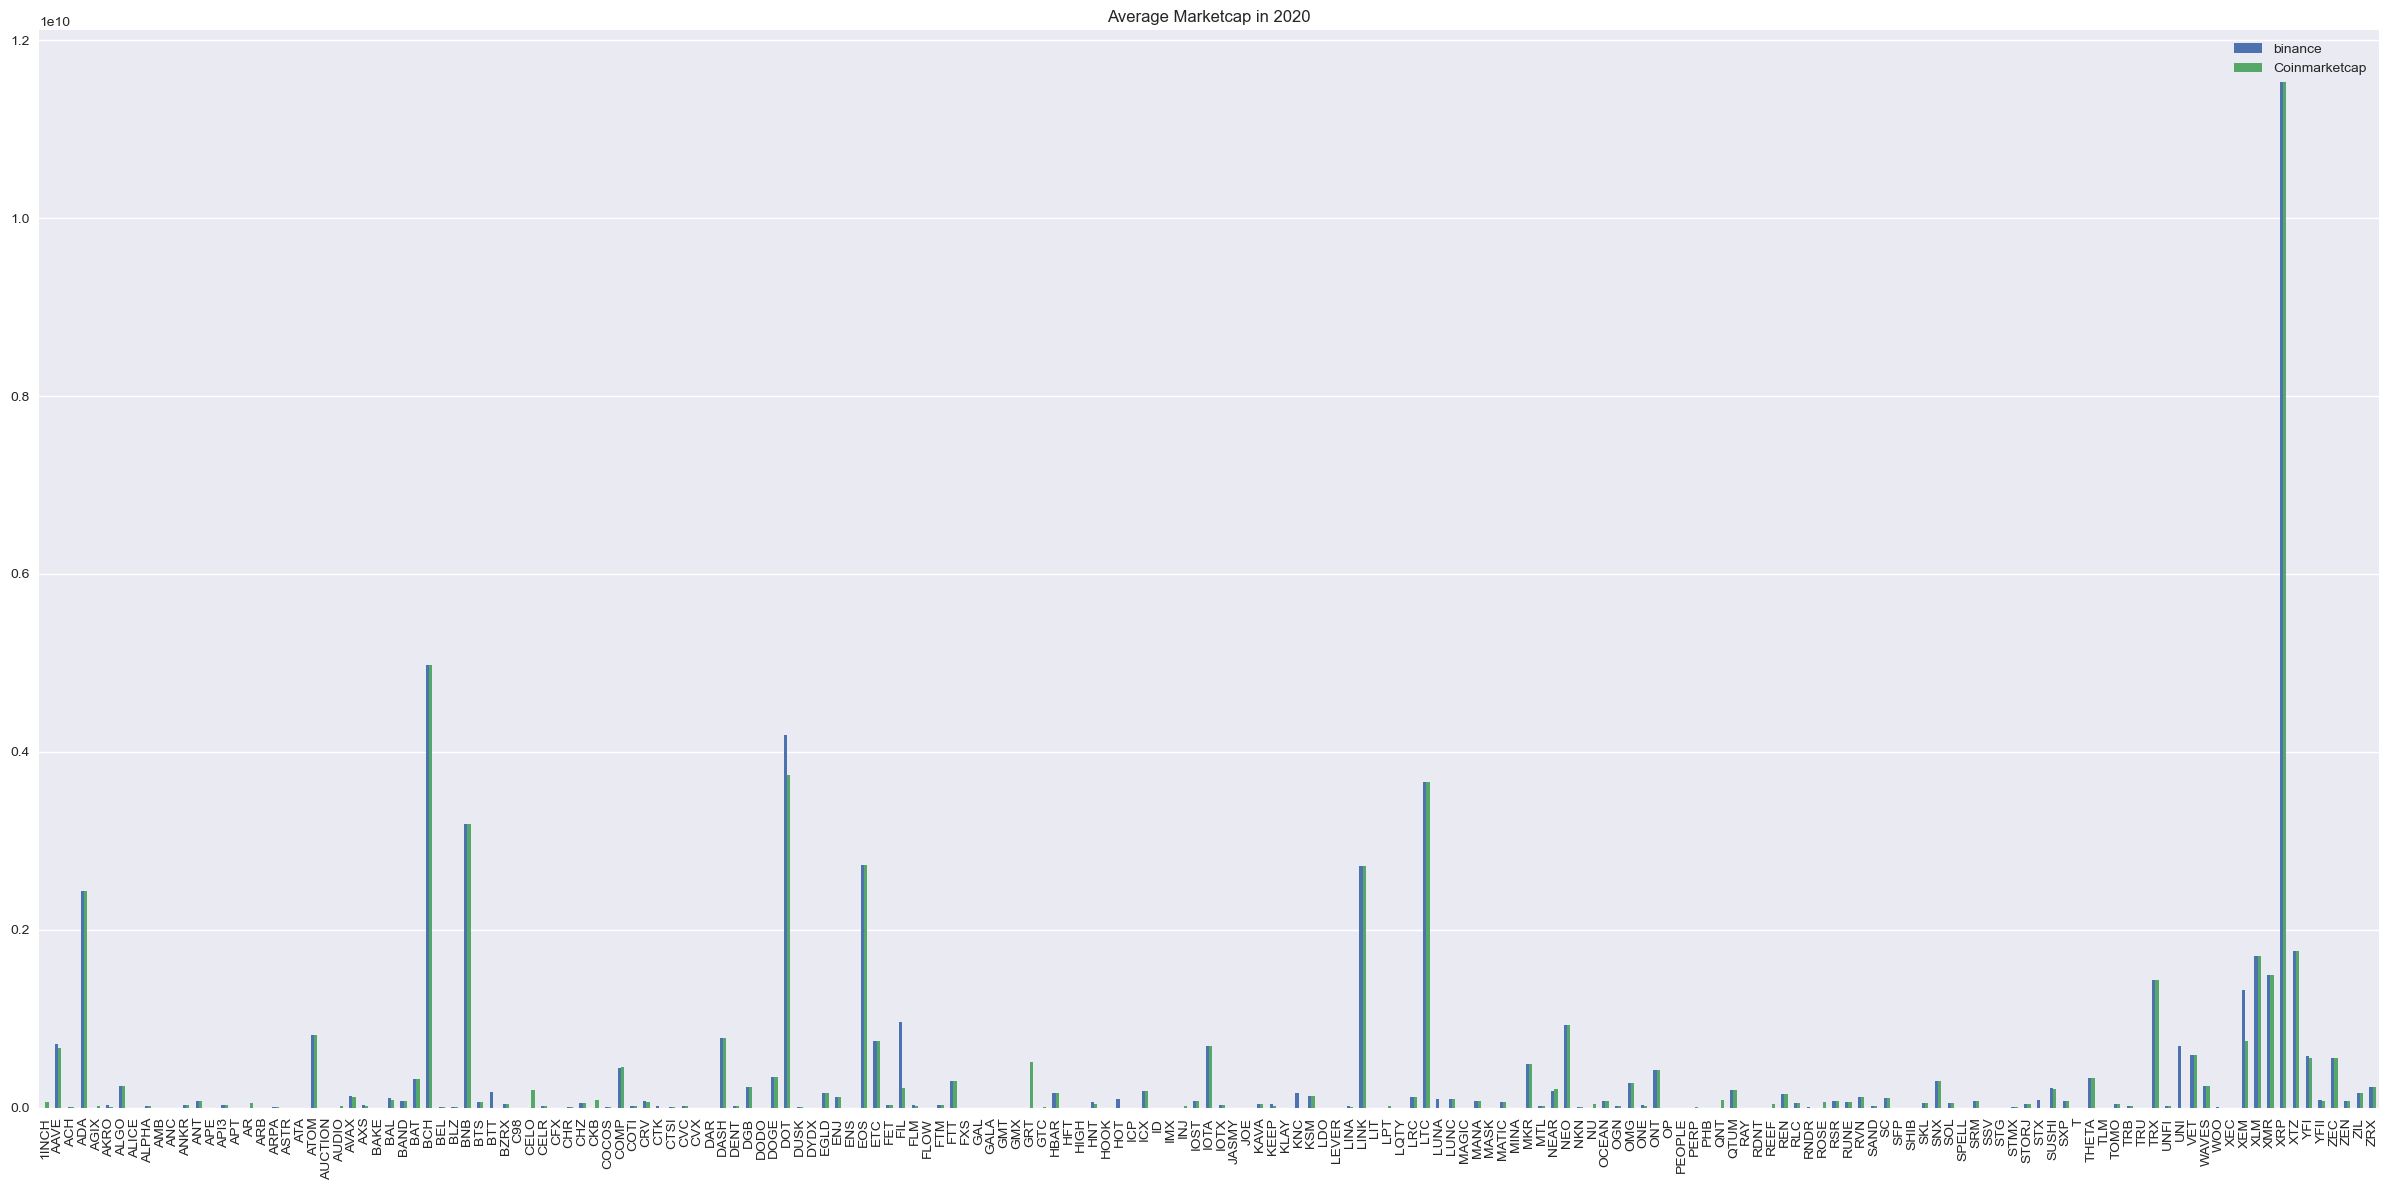

<Figure size 800x550 with 0 Axes>

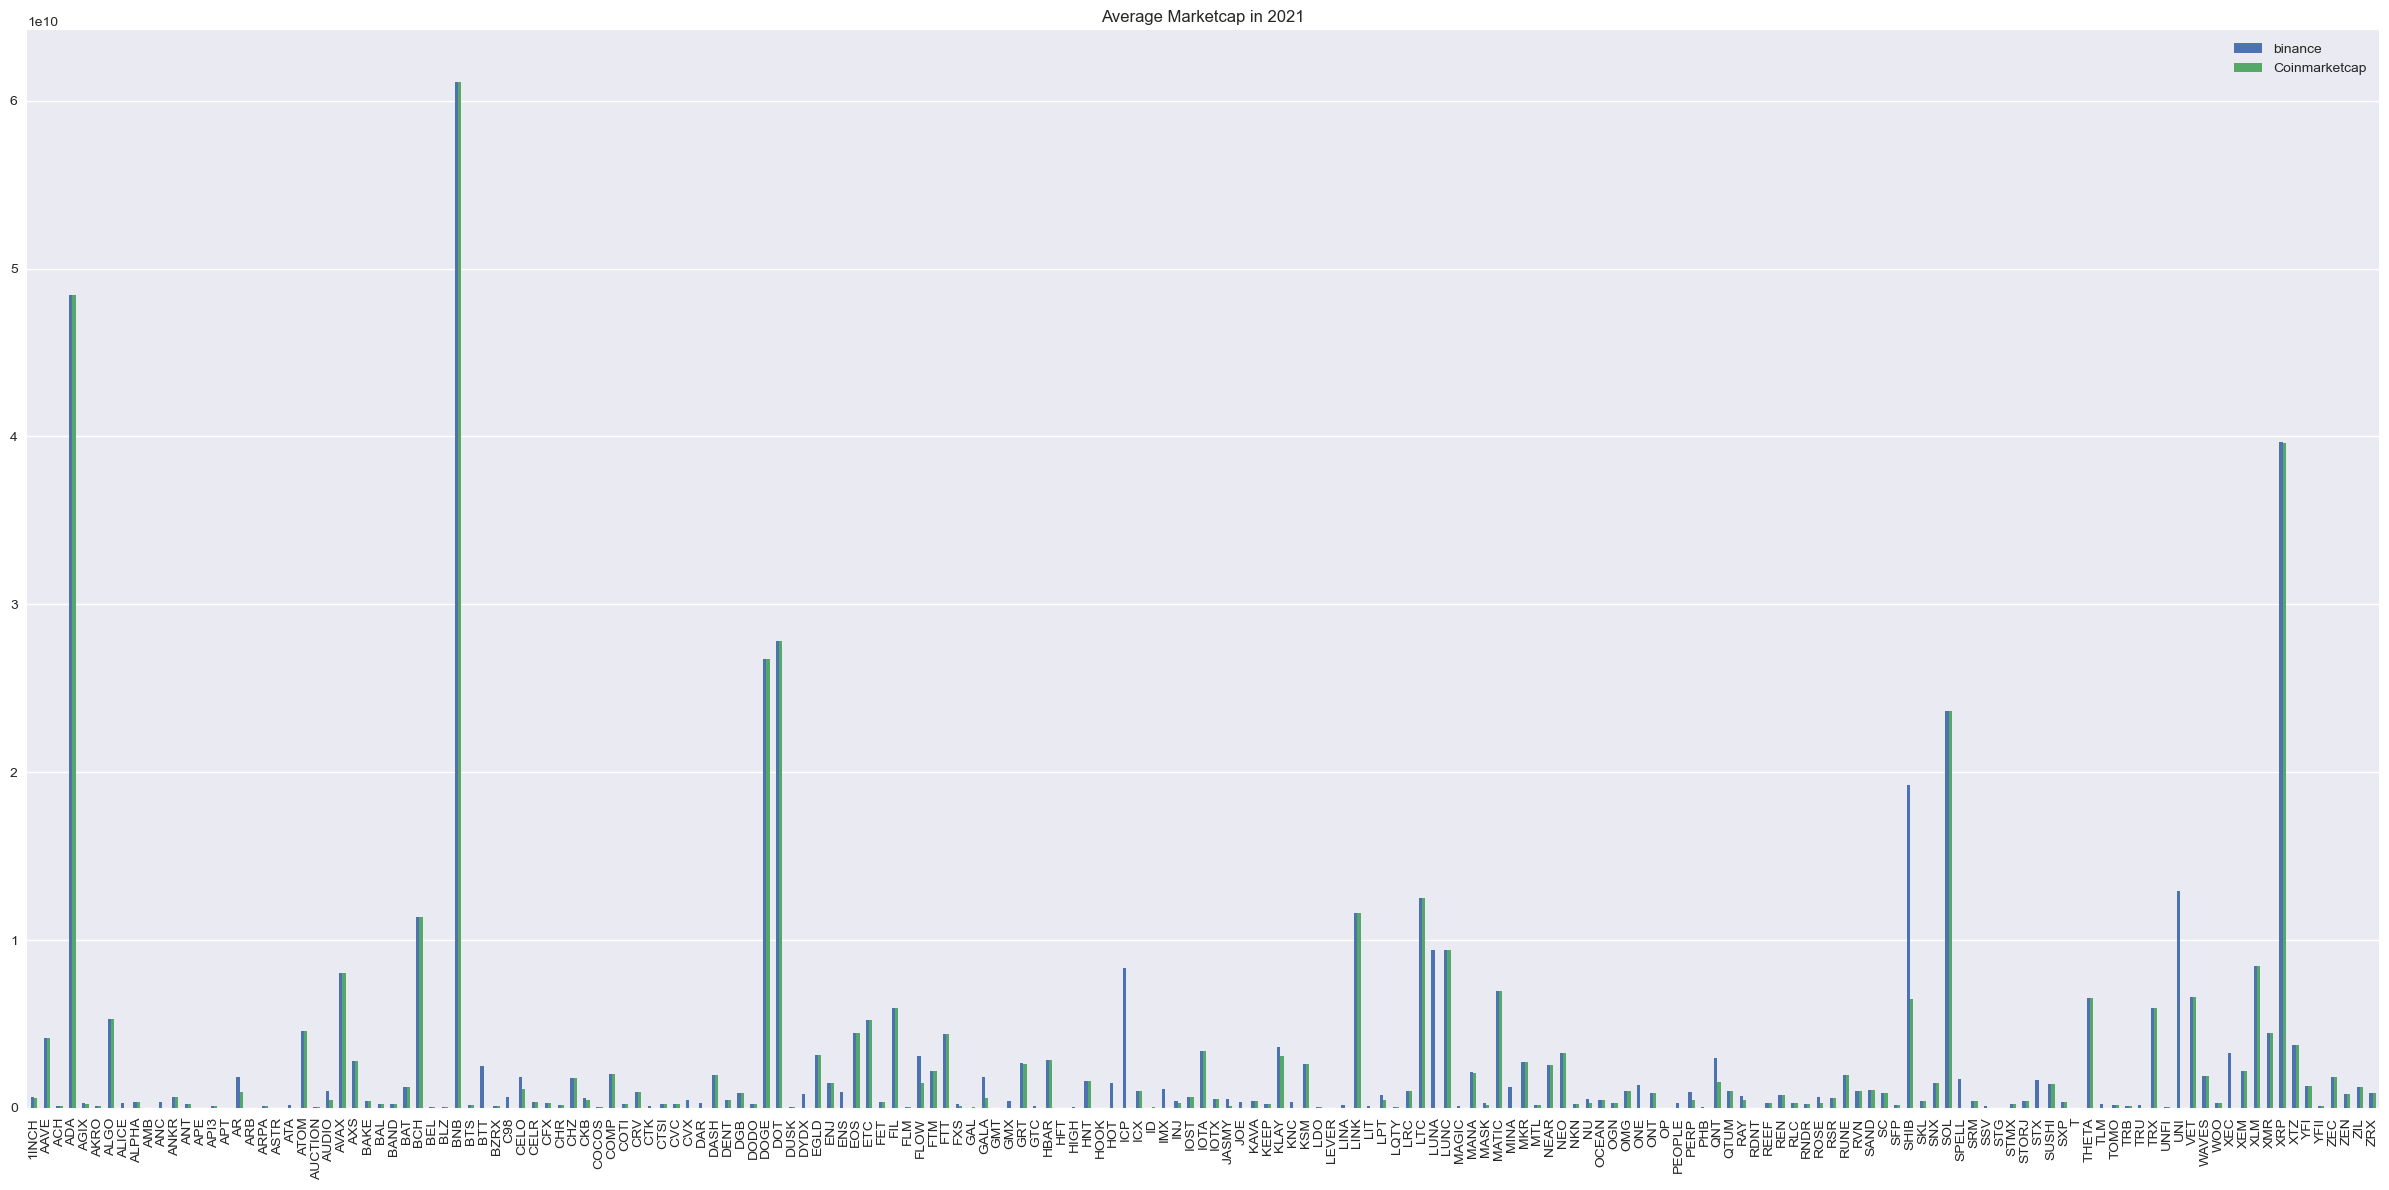

<Figure size 800x550 with 0 Axes>

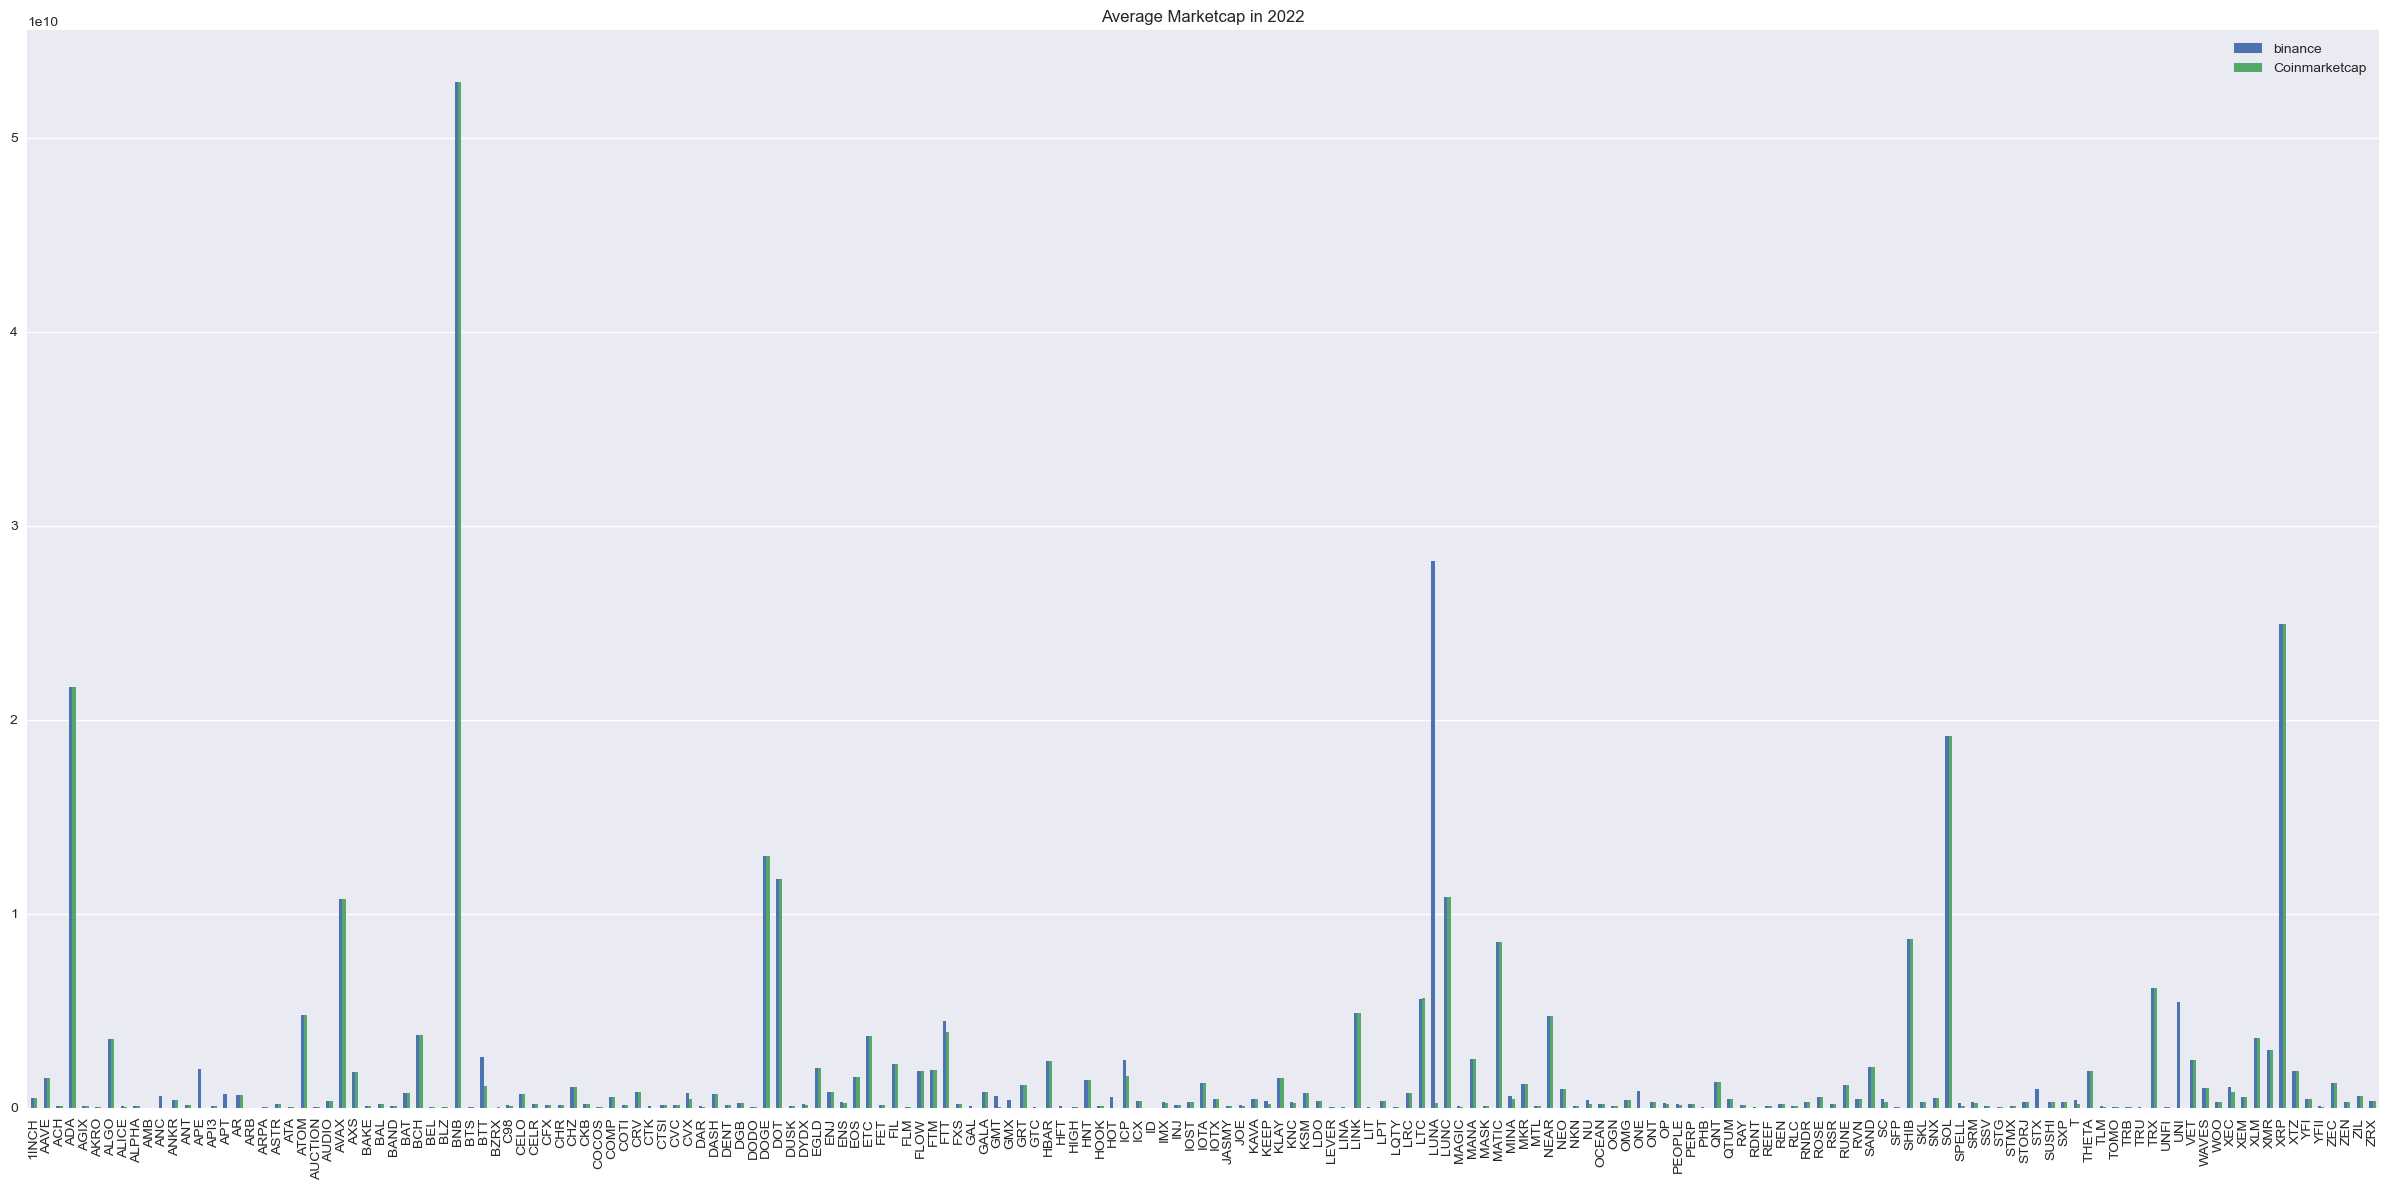

<Figure size 800x550 with 0 Axes>

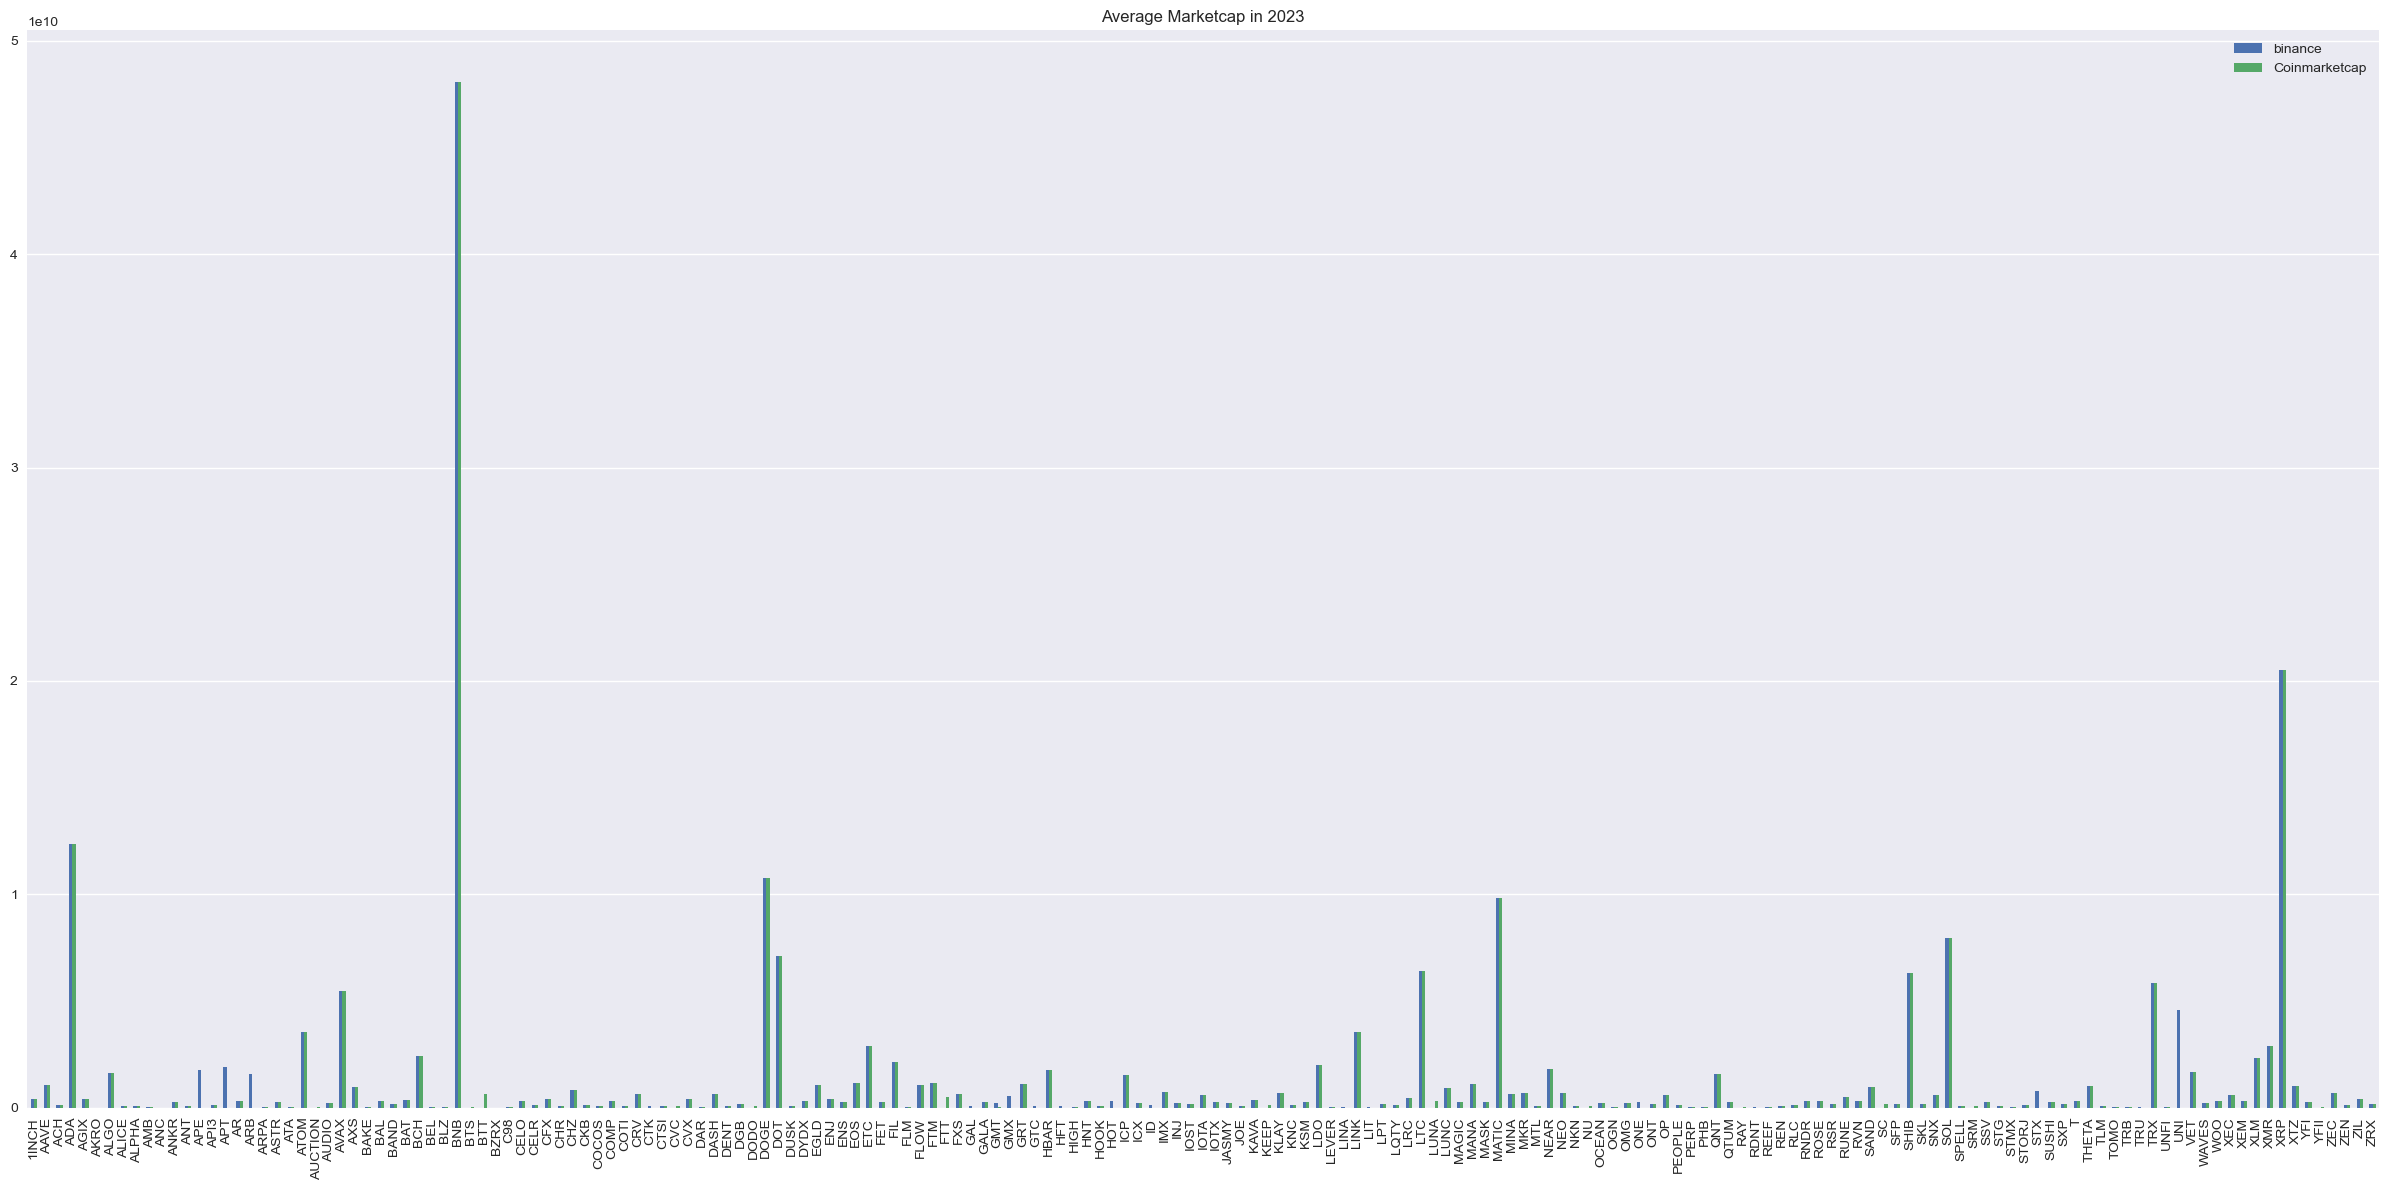

In [17]:
# 평균 mktcap 데이터
for year in range(2014,2024):
    plt.figure()
    
    year = str(year)
    concat = pd.concat([binance.mktcap.loc[year].mean(),c_mktcap.loc[year].mean()],
                        axis=1, 
                        keys=["binance","Coinmarketcap"])
    concat.drop(["BTC","ETH"]).plot(figsize=(24,12), 
                            kind="bar", 
                            title=f"Average Marketcap in {year}")
    plt.grid(axis="x")
    plt.tight_layout()